# Street Crime Analysis In England Before and During COVID-19 (2018-2021 Sept)
 

- We set to analyse street crime before and during the Covid-19 Pandemic in England with a major focus on London and then in comparison to other cities. We are already in the middle of a pandemic, 2nd year, and we wanted to look into crime as a factor to see how it has been affected during this period. Looking into crime would help us understand if there is any need for alarm in terms of security, whether we have to be dealing with a lot more than just the virus in terms of social and health wellbeing.
- We would like to find answers to the following questions:<br>
- Does the Covid-19 Pandemic have an effect on street crime levels?
- What are the top street crimes, crime locations and crime outcomes before and during the Pandemic?
- Can Machine Learning predict street crimes and give us insights about the data?

In [2]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
!pip install squarify
import squarify
!pip install plotly
import plotly.express as px
!pip install mysql-connector-python
import mysql.connector
!pip install pymysql
import pymysql

#ensure all data is displayed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data and display first 5 rows

data = pd.read_csv('data/london_df.csv')
data.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Offender sent to prison,Barking and Dagenham,0.0,0
1,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.0,0
2,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.0,0
3,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.0,0
4,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.0,0


In [42]:
data.tail()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
2844236,2021-09-01,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1
2844237,2021-09-01,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Theft from the person,Under investigation,Westminster,42.034,1
2844238,2021-09-01,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1
2844239,2021-09-01,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1
2844240,2021-09-01,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1


In [ ]:
# display data columns

data.columns

Index(['Unnamed: 0', 'month', 'reported by', 'longitude', 'latitude',
       'location', 'lsoa code', 'lsoa name', 'crime type',
       'last outcome category', 'borough_london', 'stringency', 'covid'],
      dtype='object')

In [ ]:
#drop unnecessary column
data.drop('Unnamed: 0', inplace=True, axis=1) 

In [ ]:
# display data shape

data.shape

(2844241, 12)

In [ ]:
# display data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   month                  object 
 1   reported by            object 
 2   longitude              float64
 3   latitude               float64
 4   location               object 
 5   lsoa code              int64  
 6   lsoa name              object 
 7   crime type             object 
 8   last outcome category  object 
 9   borough_london         object 
 10  stringency             float64
 11  covid                  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 260.4+ MB


In [ ]:
#numerical data summary
data.describe()

,longitude,latitude,lsoa code,stringency,covid
count,2.844241e+06,2.844241e+06,2.844241e+06,2.844241e+06,2.844241e+06
mean,-1.179504e-01,5.151097e+01,1.004724e+06,2.514905e+01,3.889168e-01
std,1.425669e-01,6.619617e-02,8.076620e+03,3.282504e+01,4.875045e-01
min,-4.976980e-01,5.129442e+01,1.000001e+06,0.000000e+00,0.000000e+00
25%,-1.989330e-01,5.147102e+01,1.001410e+06,0.000000e+00,0.000000e+00
50%,-1.128980e-01,5.151533e+01,1.002714e+06,0.000000e+00,0.000000e+00
75%,-3.126500e-02,5.155411e+01,1.004027e+06,6.430310e+01,1.000000e+00
max,3.071510e-01,5.168717e+01,1.033746e+06,8.748037e+01,1.000000e+00


In [ ]:
#check for null values in dataset
data.isna().sum()

month                    0
reported by              0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
borough_london           0
stringency               0
covid                    0
dtype: int64

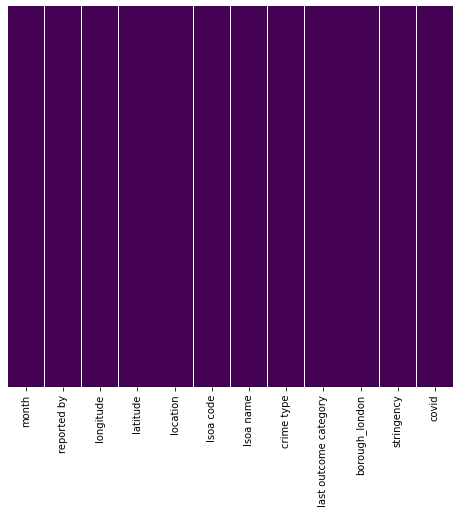

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualize the null values
plt.figure(figsize = (8,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
plt.savefig('Missing Values')

### General EDA

This clearly shows that violence and sexual offences have had the highest record, in fact extremely high count compared to other crimes

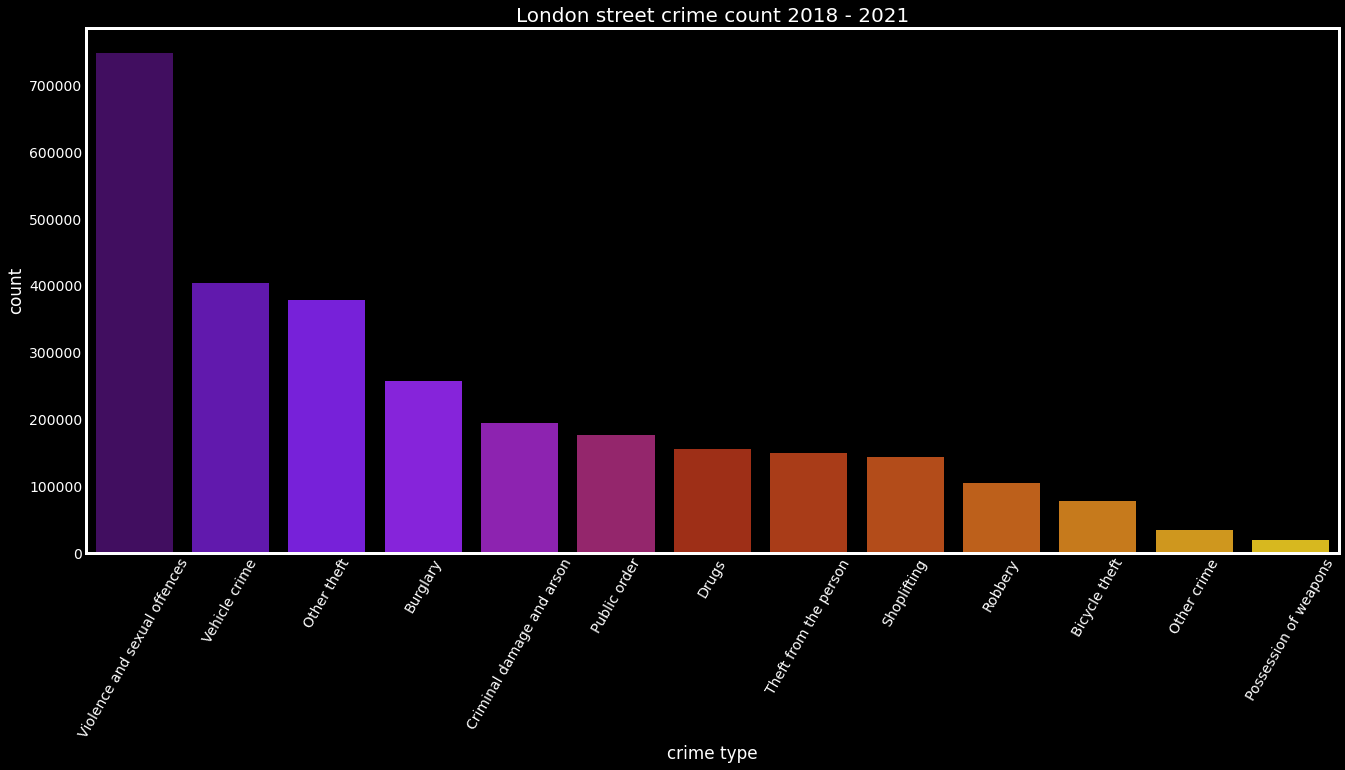

In [21]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['crime type'], order=data['crime type'].value_counts().index, palette = 'gnuplot')


plt.title('London street crime count 2018 - 2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 60, fontsize = 14)
plt.grid(False)
plt.show()

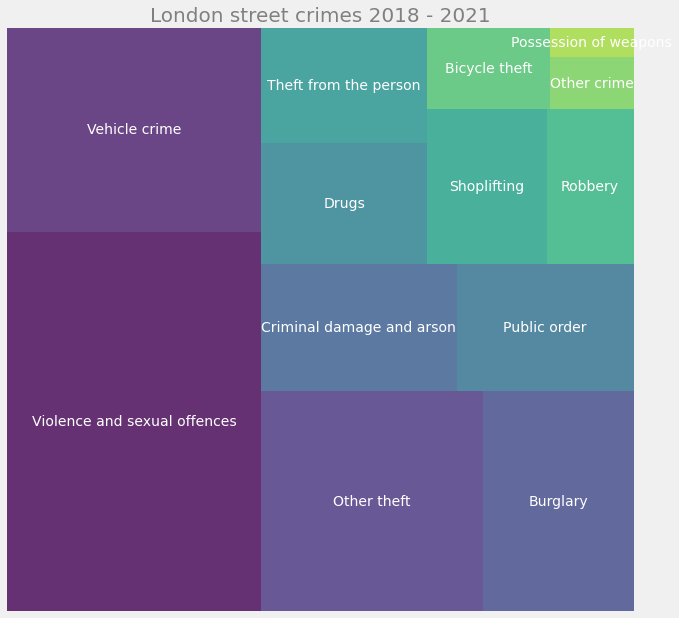

In [11]:
y = data['crime type'].value_counts()
    
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

color = plt.cm.viridis(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('London street crimes 2018 - 2021', fontsize = 20, color = 'grey')

plt.axis('off')
plt.show()

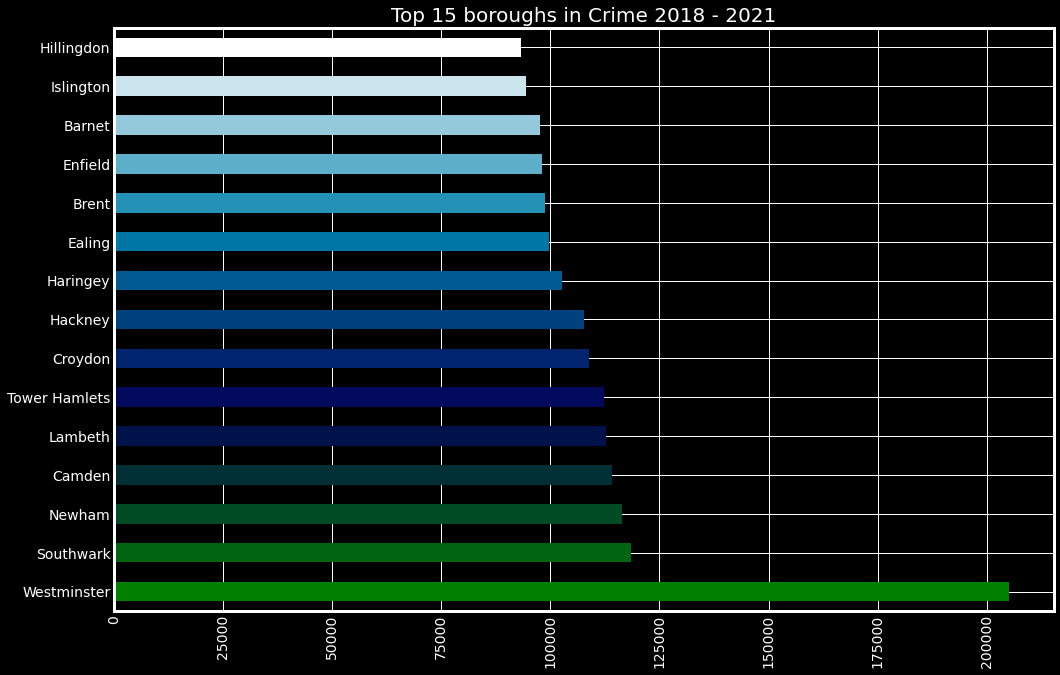

In [15]:
#top 15 boroughs with most crimes
plt.rcParams['figure.figsize'] = (10, 5)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.ocean(np.linspace(0, 1, 15))
data['borough_london'].value_counts().head(15).plot.barh(color = color, figsize = (15, 10))

plt.title('Top 15 boroughs in Crime 2018 - 2021',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(True)

plt.show()

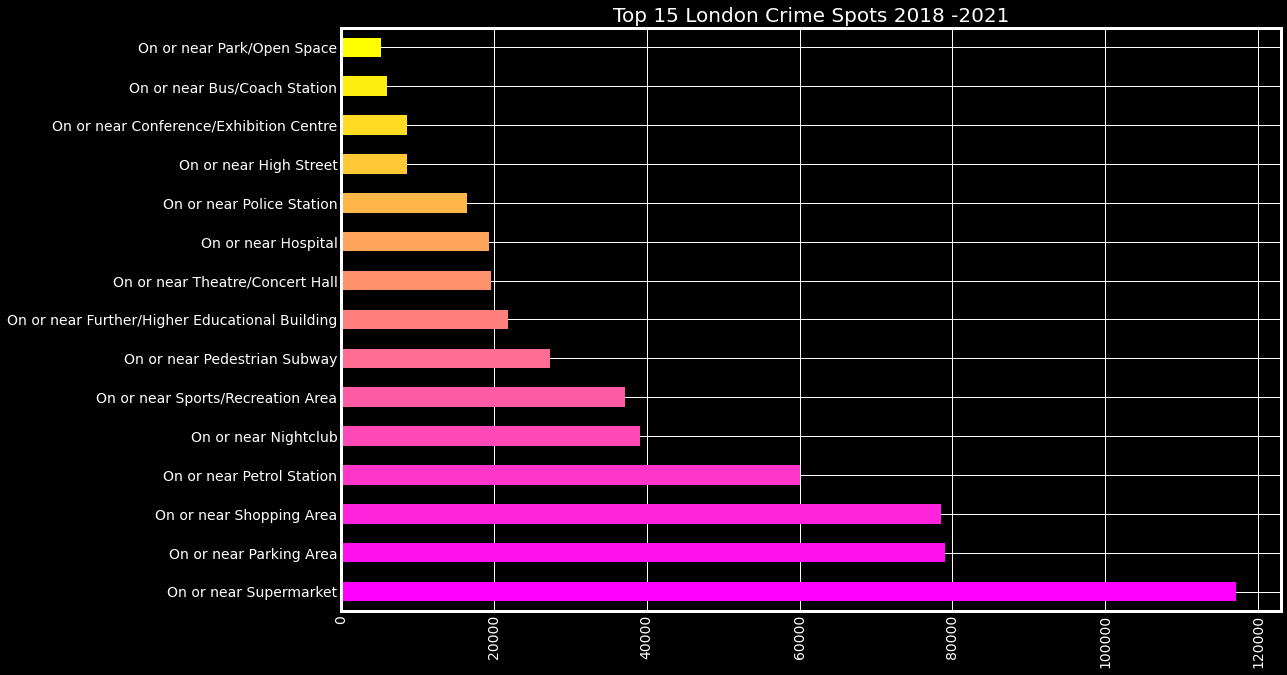

In [17]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
data['location'].value_counts().head(15).plot.barh(color = color, figsize = (15, 10))

plt.title('Top 15 London Crime Spots 2018 -2021',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

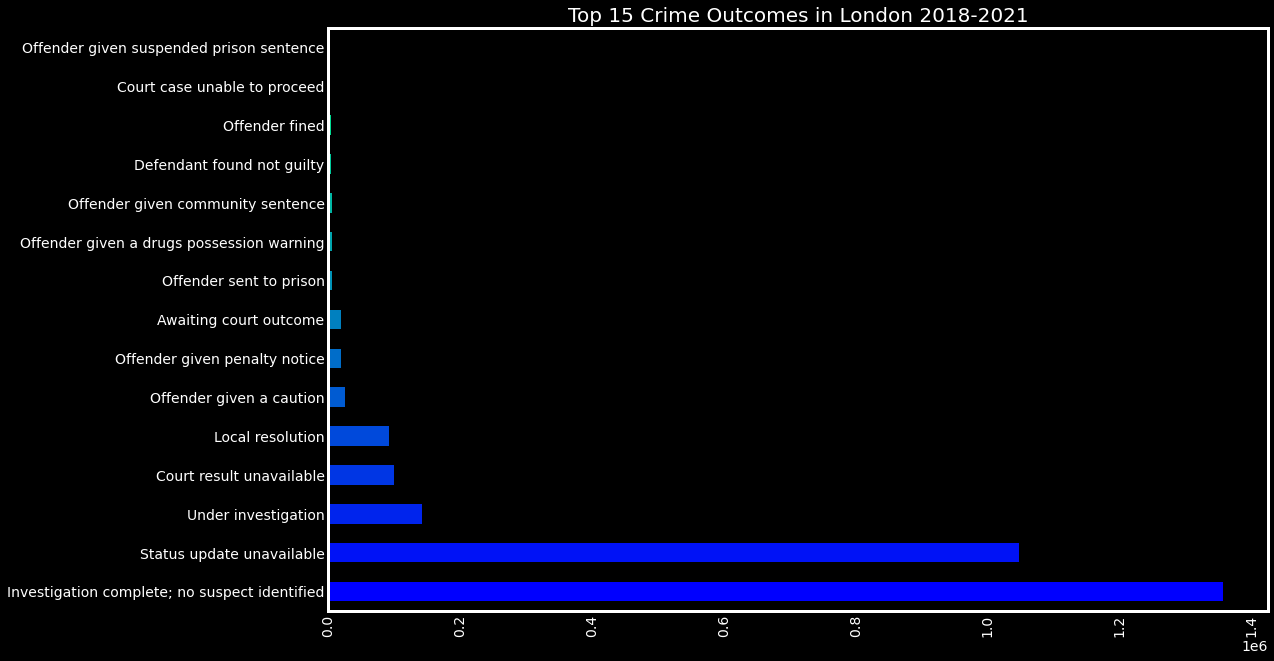

In [18]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.winter(np.linspace(0, 1, 15))
data['last outcome category'].value_counts().head(15).plot.barh(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Outcomes in London 2018-2021',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

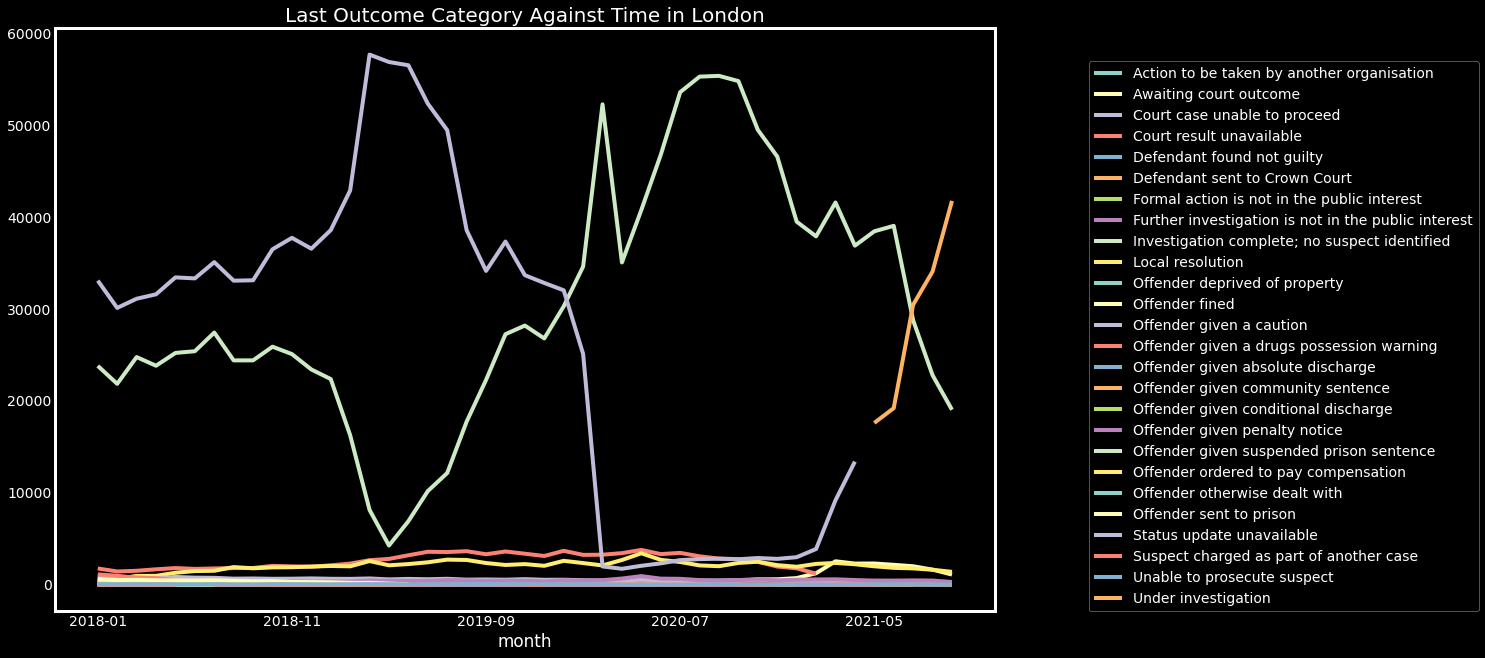

In [20]:
#plt.style.use('seaborn')
plt.style.use('dark_background')
m = data.groupby(['month', 'last outcome category']).size().unstack().plot.line(figsize=(15, 10))
plt.title('Last Outcome Category Against Time in London',fontsize = 20)
plt.grid(b=None)
m.legend(loc=(1.1,0))

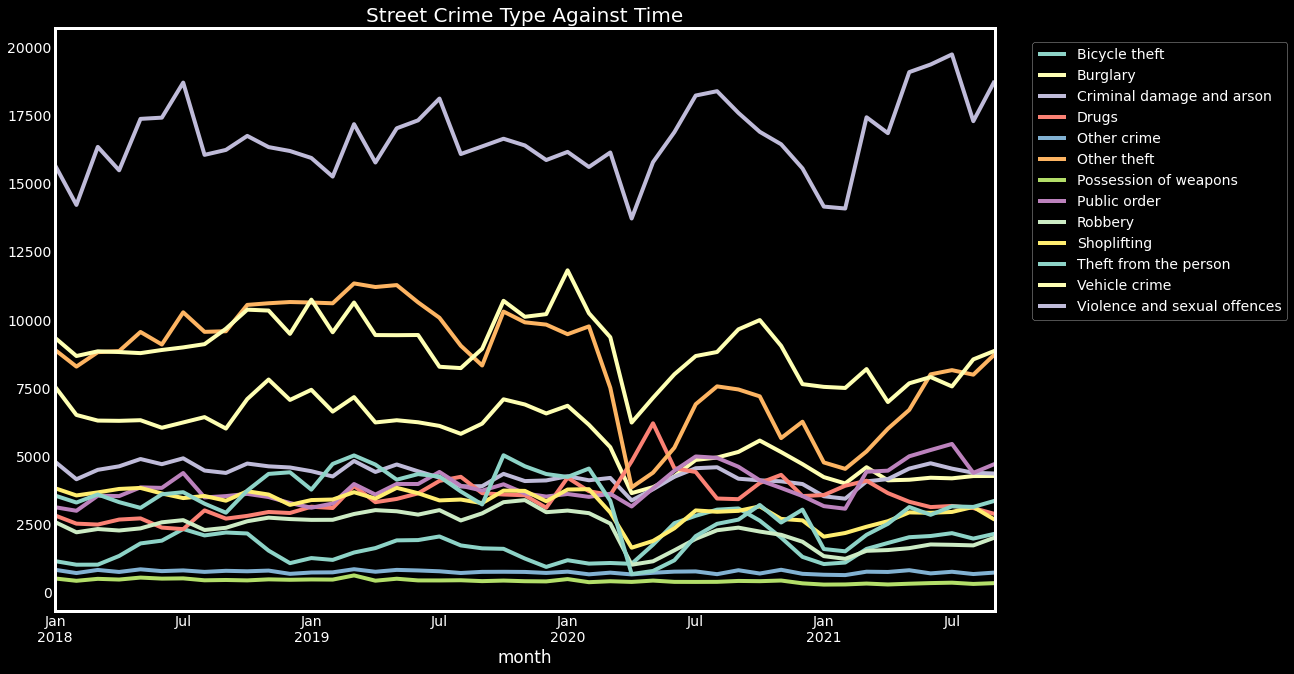

In [ ]:
m = data.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Street Crime Type Against Time',fontsize = 20)

m.legend(loc=(1.04,0.5))

There is a significant decrease in all crimes immediately after the first issued lockdown except for drugs and bicycle theft which show an increase before gaining a downward trend. Eventually all other street crimes start to rise again but still maintaining lower count during the pandemic except public order which shows an increase compared to 2018 and 2019

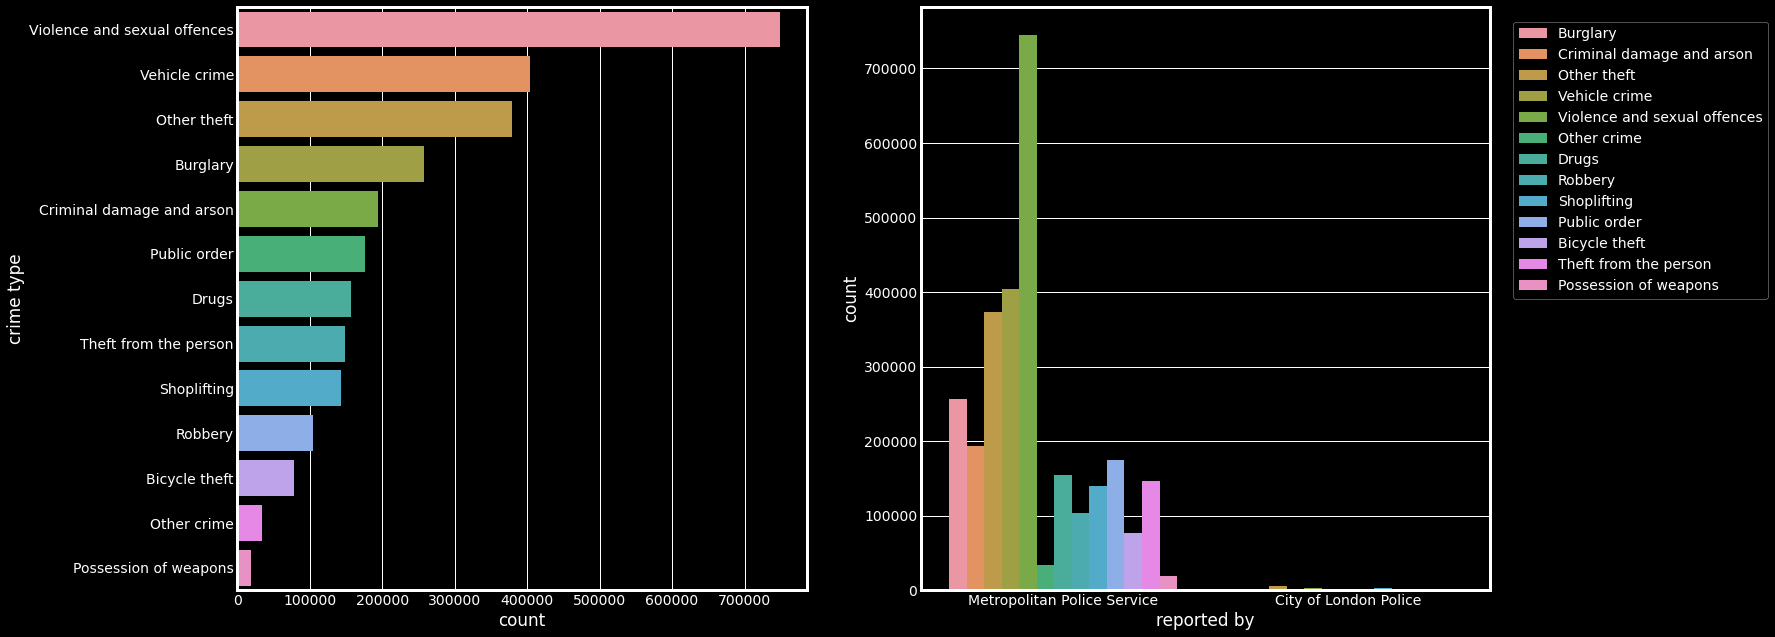

In [ ]:
#crime type count in London and crime count by police force 2018- 2021
fig, axs = plt.subplots(1, 2, figsize=(20,10))
#sns.set(font_scale = 2)
sns.countplot(y='crime type', data=data, order=data['crime type'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='crime type', data=data, order = data['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5))
#lt.grid(False)
plt.show()

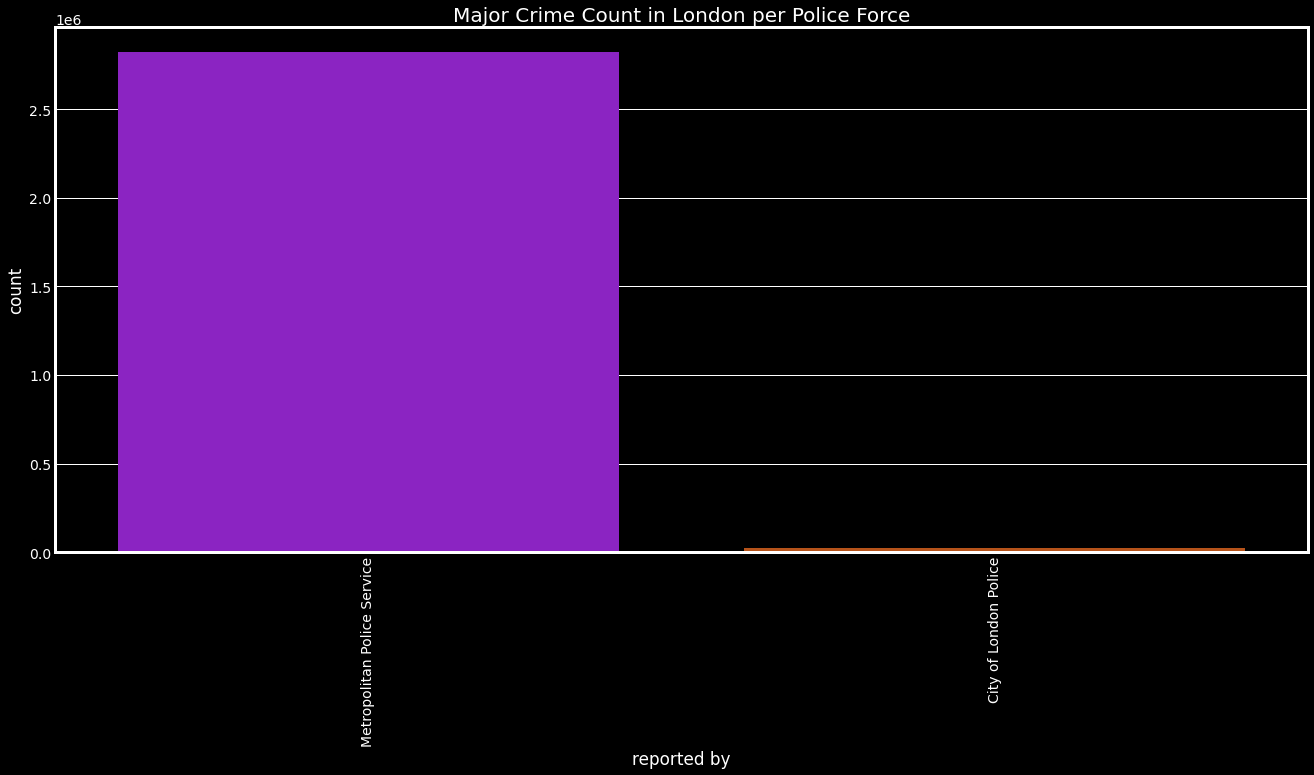

In [ ]:
#total crime count by police force
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['reported by'], palette = 'gnuplot')

plt.title('Major Crime Count in London per Police Force', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
#plt.grid(False)
plt.show()

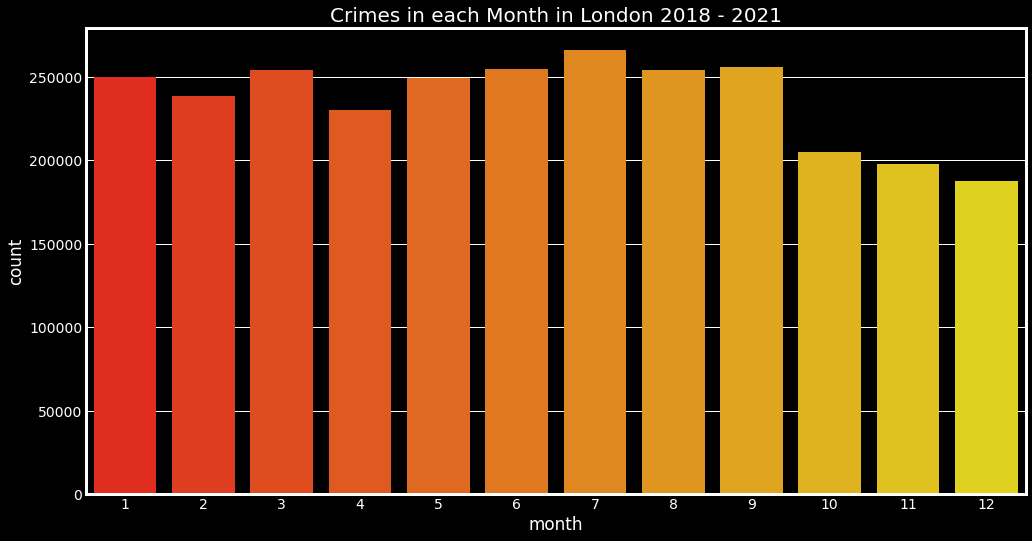

In [27]:
#total crime count against month 2018 - 2021
data['month'] = pd.to_datetime(data['month'])


#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['month'].dt.month, palette = 'autumn',)
plt.title('Crimes in each Month in London 2018 - 2021', fontsize = 20)


plt.show()

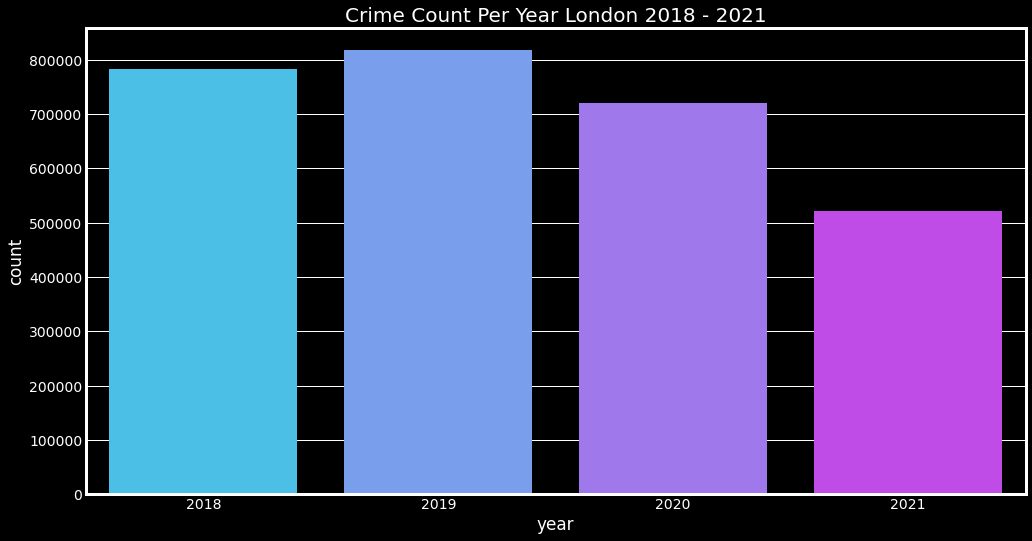

In [29]:
data['month'] = pd.to_datetime(data['month'])

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['month'].dt.year, palette = 'cool',)
plt.title('Crime Count Per Year London 2018 - 2021', fontsize = 20)
plt.xlabel('year')
plt.show()

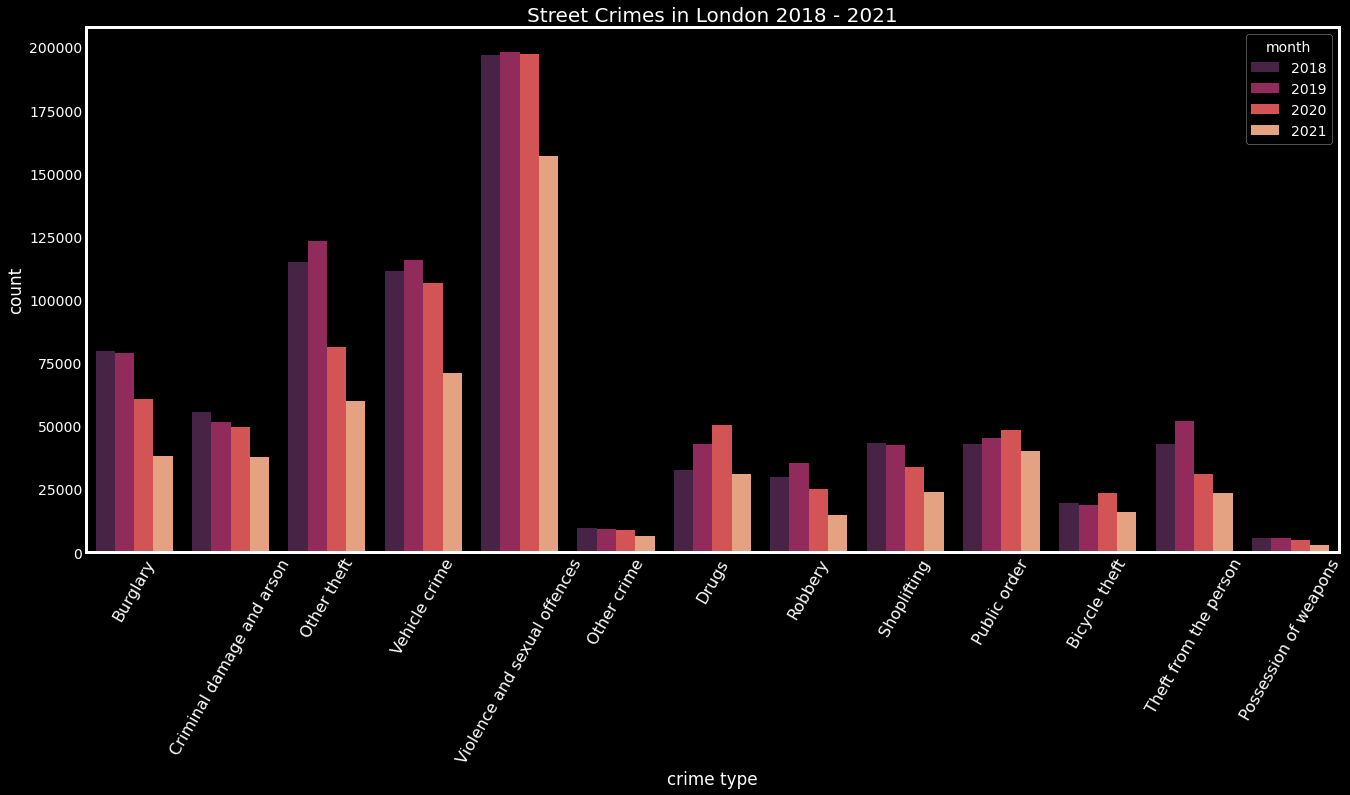

In [35]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['crime type'], hue=data['month'].dt.year, palette = 'rocket')

plt.title('Street Crimes in London 2018 - 2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 60, fontsize = 16)
plt.grid(False)
plt.show()

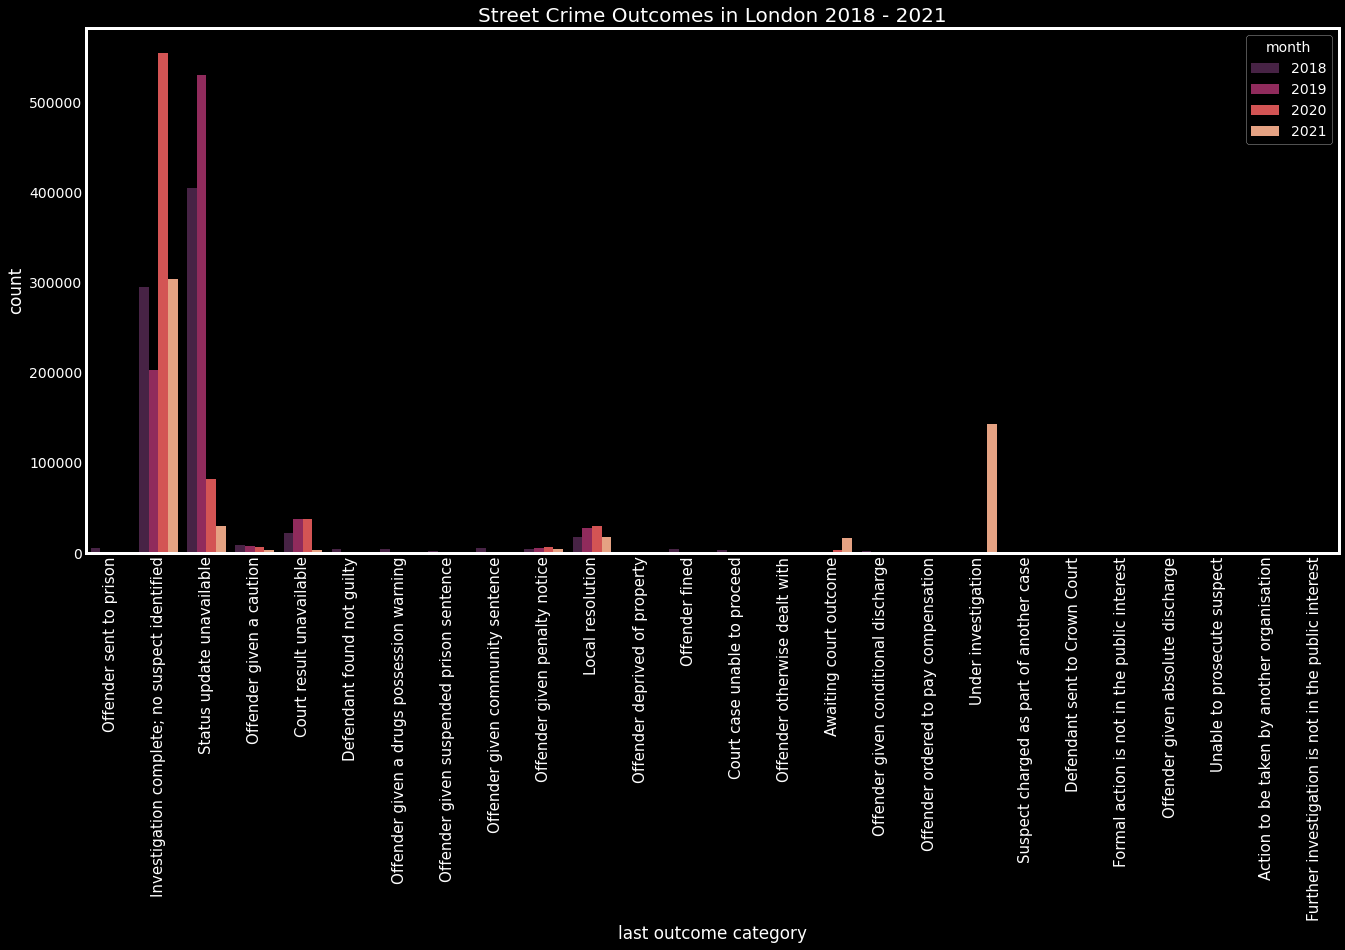

In [39]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data['last outcome category'], hue=data['month'].dt.year, palette = 'rocket')

plt.title('Street Crime Outcomes in London 2018 - 2021', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.grid(False)
plt.show()

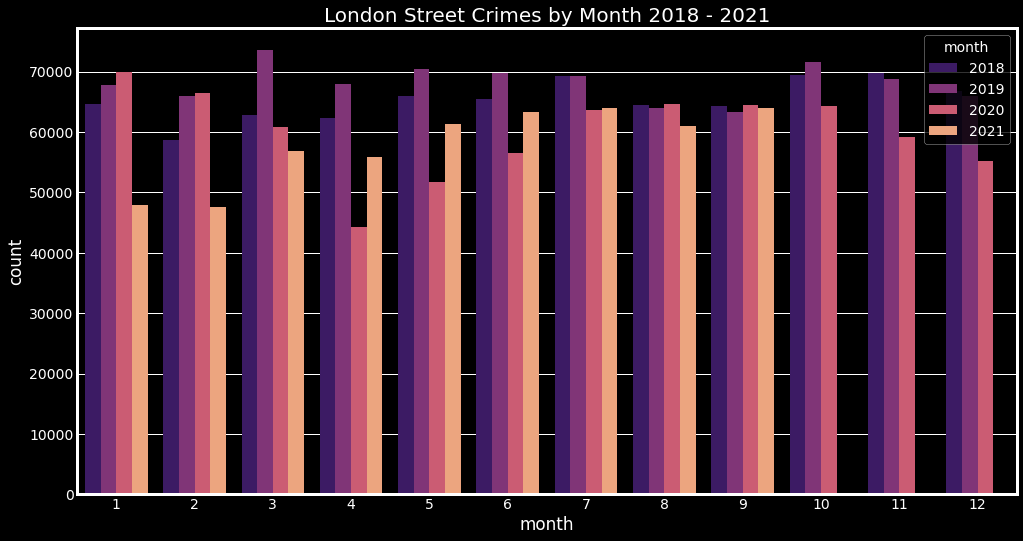

In [41]:
data['month'] = pd.to_datetime(data['month'])


#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['month'].dt.month, hue=data['month'].dt.year, palette = 'magma')
plt.title('London Street Crimes by Month 2018 - 2021', fontsize = 20)

plt.show()

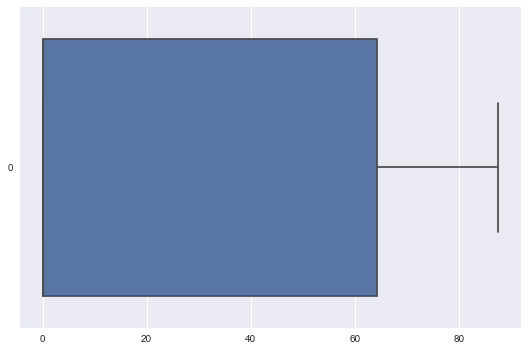

In [ ]:
#distribution of stringency of Covid-19 measures
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
sns.boxplot(data=data['stringency'], orient="h")
plt.show()

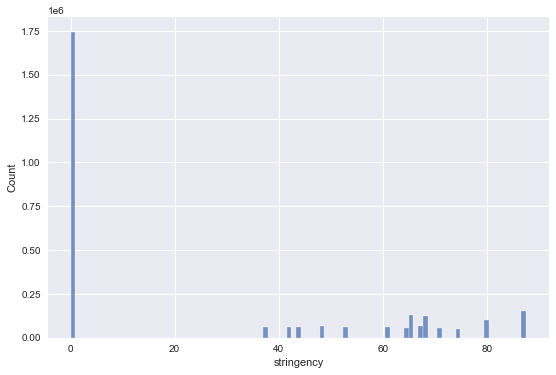

In [ ]:
#histogram of stringency of Covid-19 measures 
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('seaborn')
sns.histplot(data=data['stringency'])
plt.show()

### Plotting Pre Pandemic Period

In [44]:
data_no_s = data[data['stringency'] == 0.0]
data_no_s.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,2018-01-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Offender sent to prison,Barking and Dagenham,0.0,0
1,2018-01-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.0,0
2,2018-01-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.0,0
3,2018-01-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.0,0
4,2018-01-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.0,0


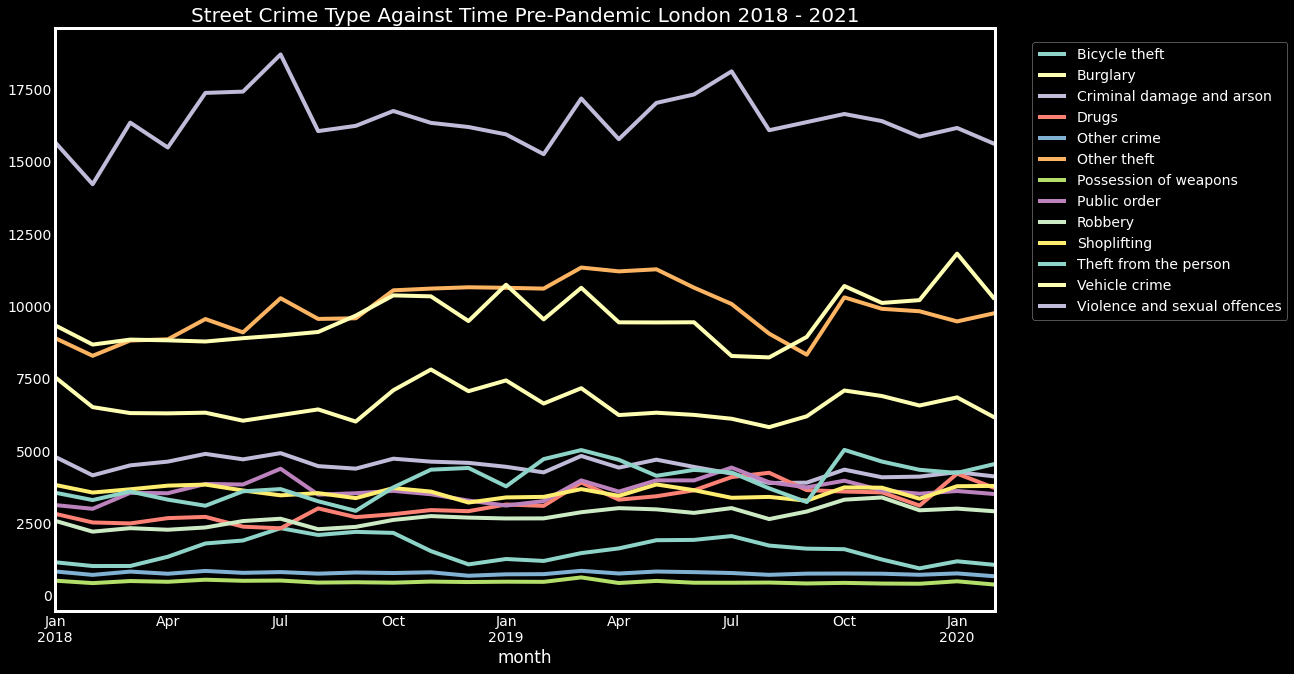

In [45]:
m = data_no_s.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Street Crime Type Against Time Pre-Pandemic London 2018 - 2021',fontsize = 20)

m.legend(loc=(1.04,0.5))

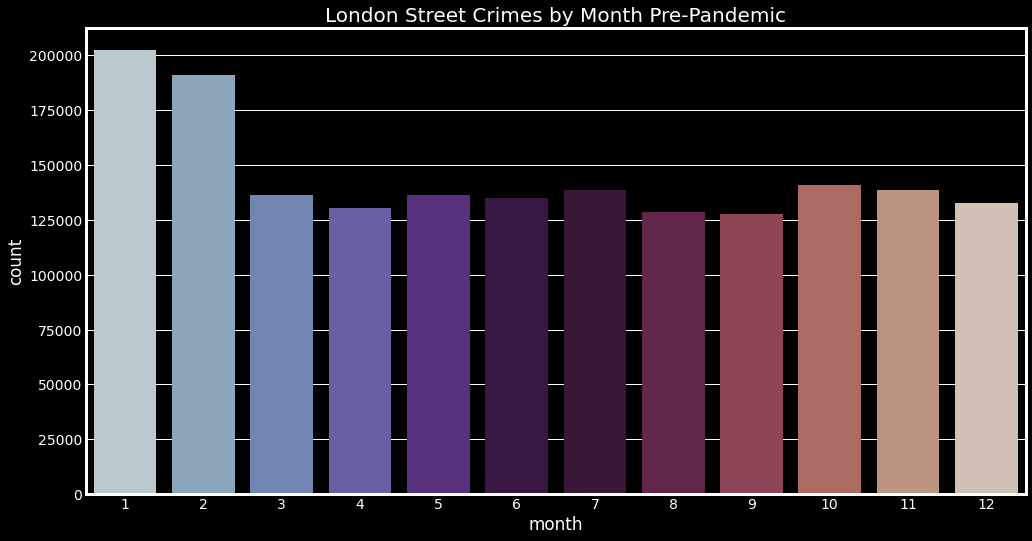

In [55]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)
data_no_s['new_month'] = data_no_s['month'].dt.month

sns.countplot(data_no_s['new_month'], palette = 'twilight',)

plt.title('London Street Crimes by Month Pre-Pandemic', fontsize = 20)
plt.xlabel('month')

plt.show()


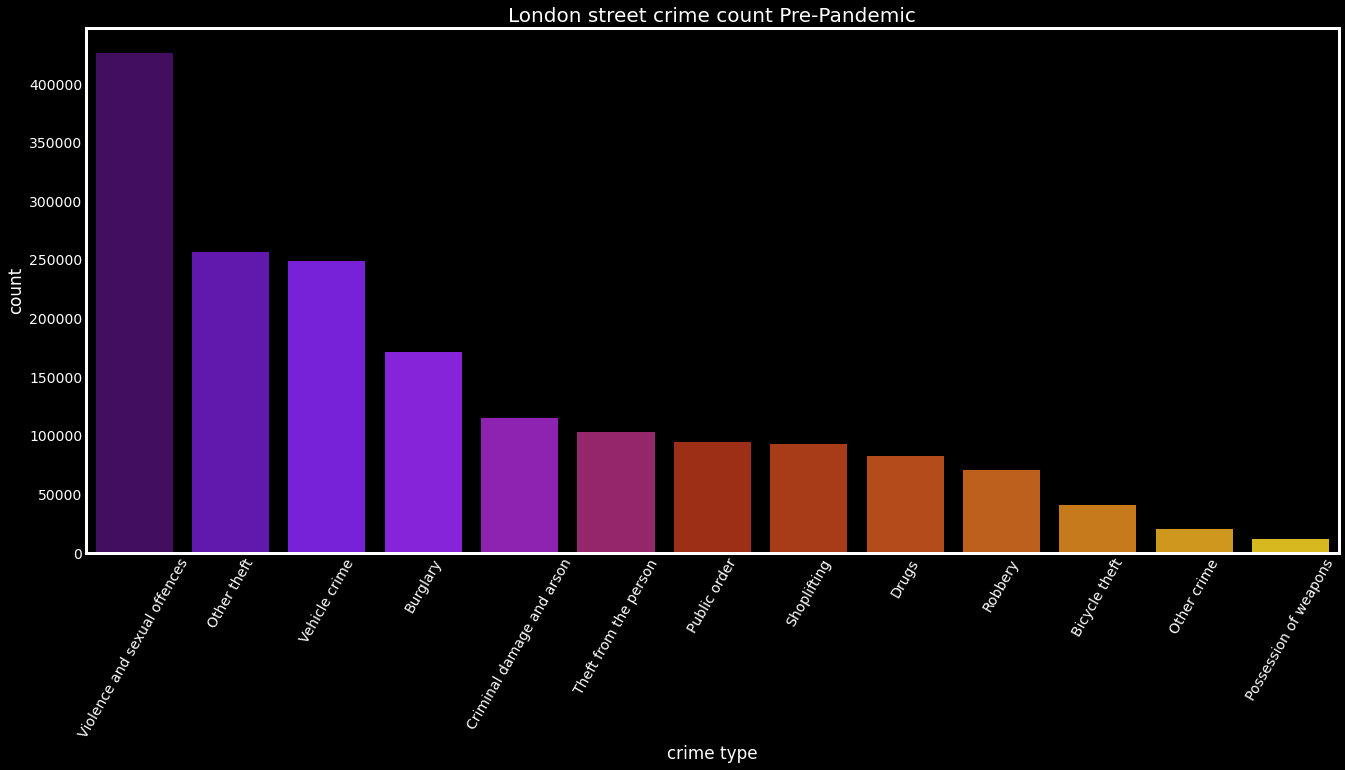

In [65]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data_no_s['crime type'], order=data_no_s['crime type'].value_counts().index, palette = 'gnuplot')


plt.title('London street crime count Pre-Pandemic', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 60, fontsize = 14)
plt.grid(False)
plt.show()

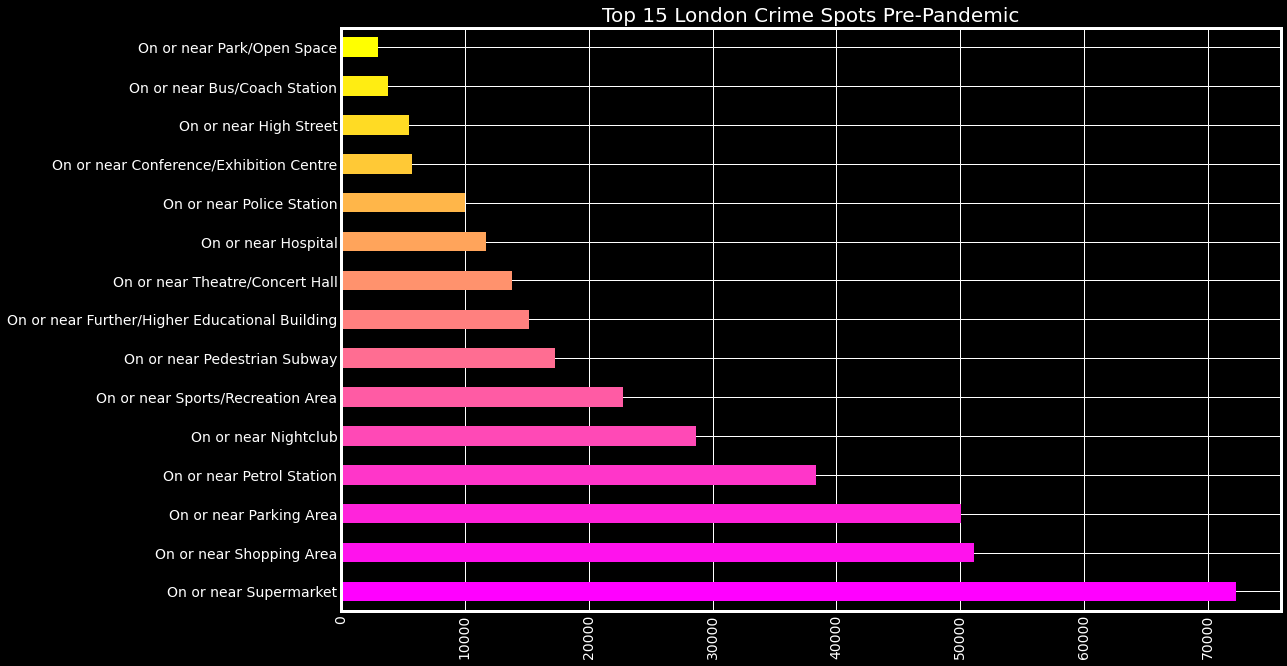

In [63]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
data_no_s['location'].value_counts().head(15).plot.barh(color = color, figsize = (15, 10))

plt.title('Top 15 London Crime Spots Pre-Pandemic',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

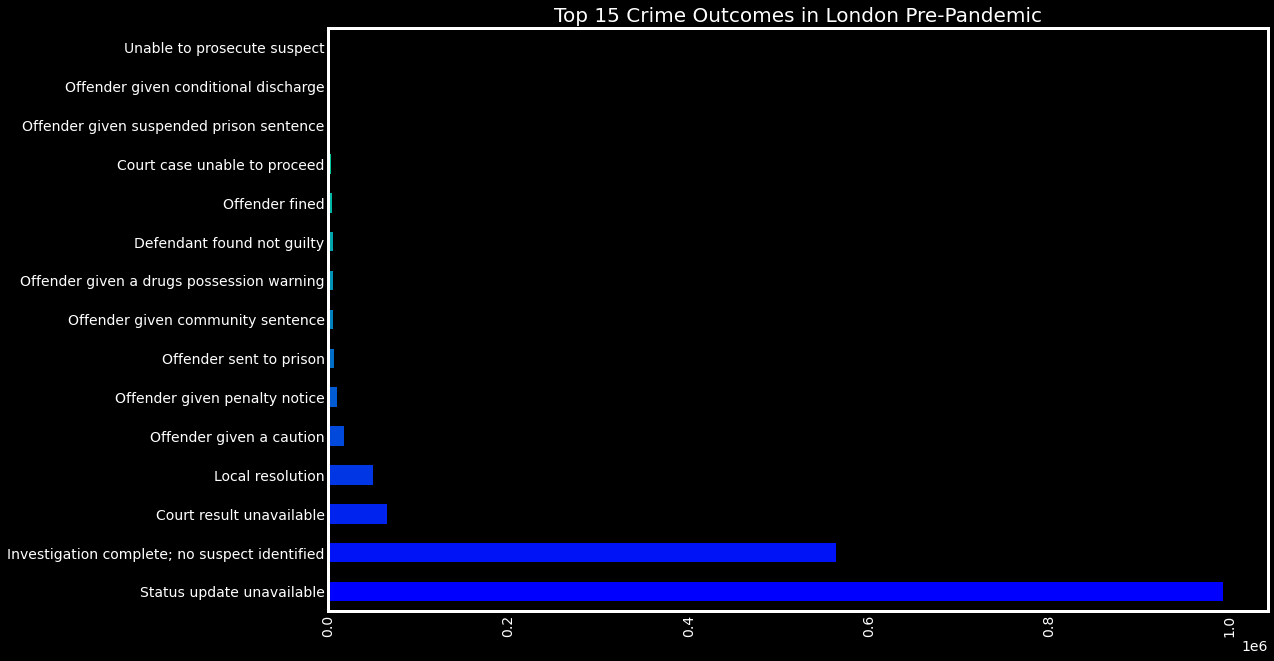

In [60]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.winter(np.linspace(0, 1, 15))
data_no_s['last outcome category'].value_counts().head(15).plot.barh(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Outcomes in London Pre-Pandemic',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

### Plotting Pandemic Period Data

In [56]:
#data with stringency(pandemic period)
data_s = data[data['stringency'] > 0.0]
data_s.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
36963,2020-03-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,37.484,0
36964,2020-03-01,Metropolitan Police Service,0.138906,51.588737,On or near Kingston Hill Avenue,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,37.484,0
36965,2020-03-01,Metropolitan Police Service,0.138906,51.588737,On or near Kingston Hill Avenue,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,37.484,0
36966,2020-03-01,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,1000027,Barking and Dagenham 001A,Criminal damage and arson,Court result unavailable,Barking and Dagenham,37.484,0
36967,2020-03-01,Metropolitan Police Service,0.145888,51.593835,On or near Providence Place,1000027,Barking and Dagenham 001A,Criminal damage and arson,Court result unavailable,Barking and Dagenham,37.484,0


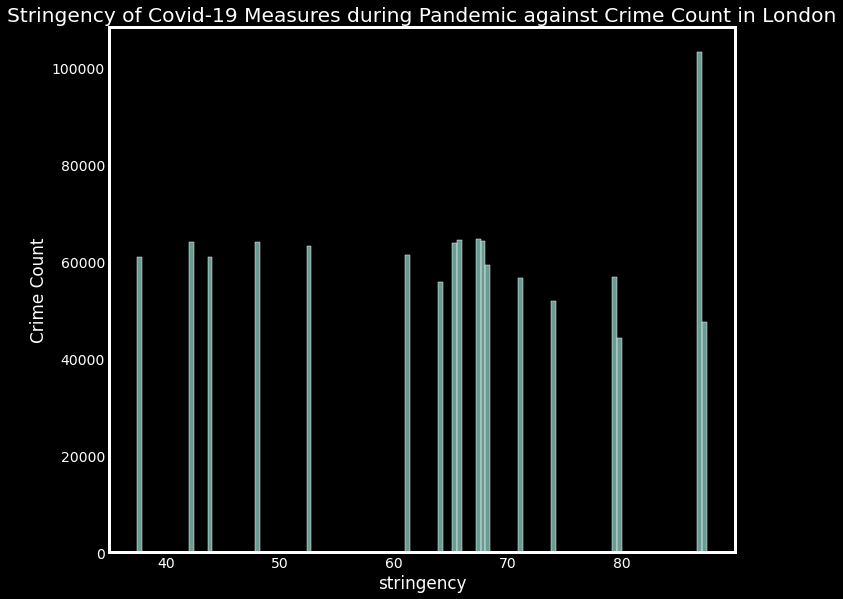

In [58]:
plt.rcParams['figure.figsize'] = (10, 9)
plt.grid(b=None)
sns.histplot(data=data_s['stringency'])
plt.title('Stringency of Covid-19 Measures during Pandemic against Crime Count in London')
plt.ylabel('Crime Count')
plt.show()

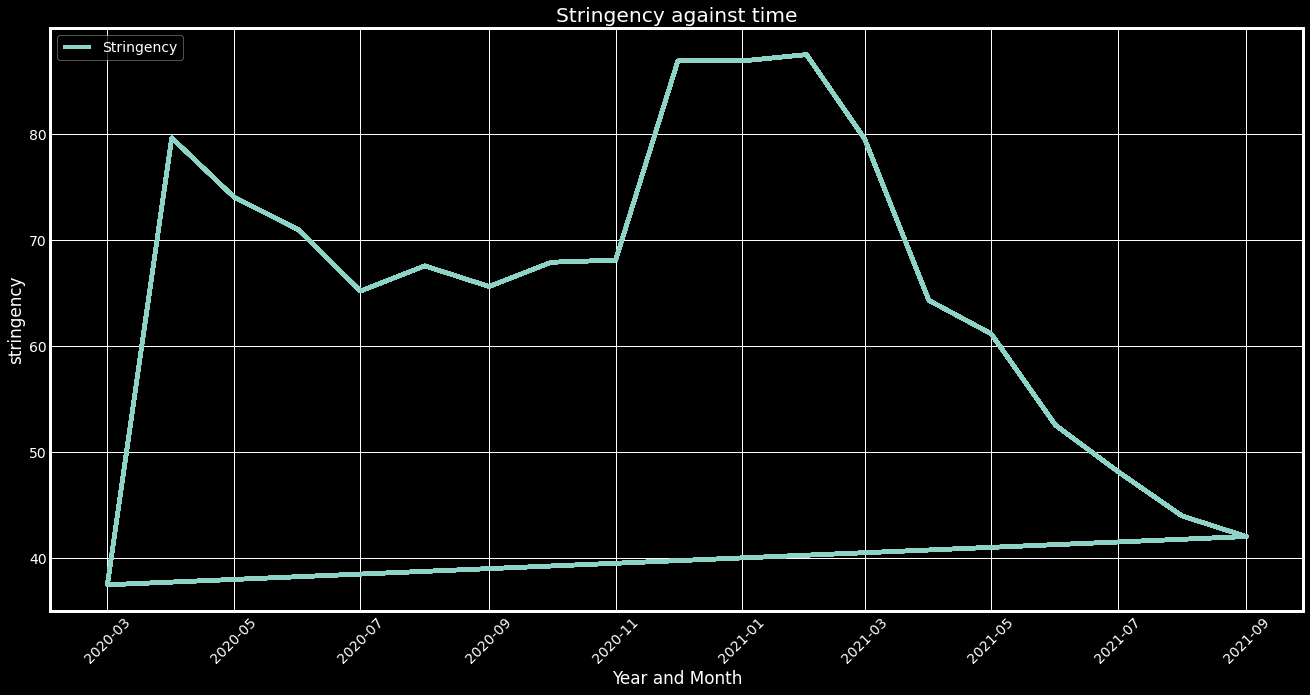

In [70]:
plt.figure(figsize=(20,10))

plt.plot(data_s['month'], data_s['stringency'], label = 'Stringency')

plt.xlabel('Year and Month')
plt.ylabel('stringency')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Stringency against time')

plt.show()

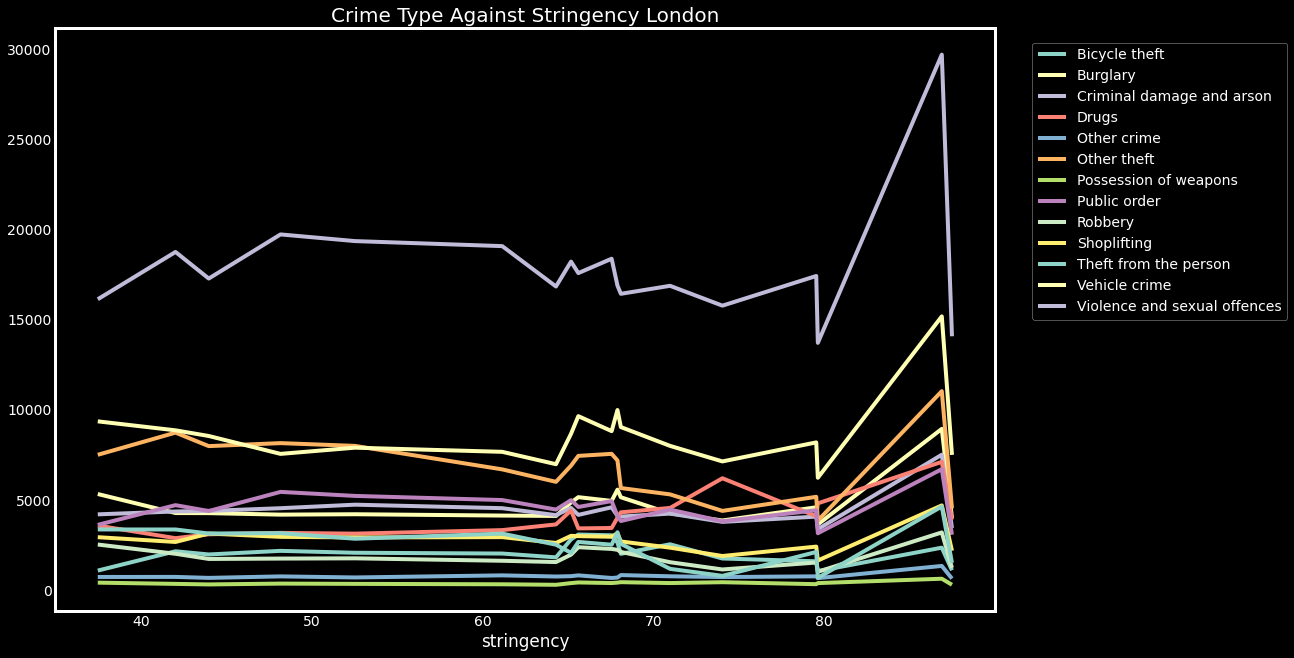

In [71]:
#change in crime count against stringency of Covid-19 measures
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

m = data_s.groupby(['stringency', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)
plt.title('Crime Type Against Stringency London',fontsize = 20)
m.legend(loc=(1.04,0.5))

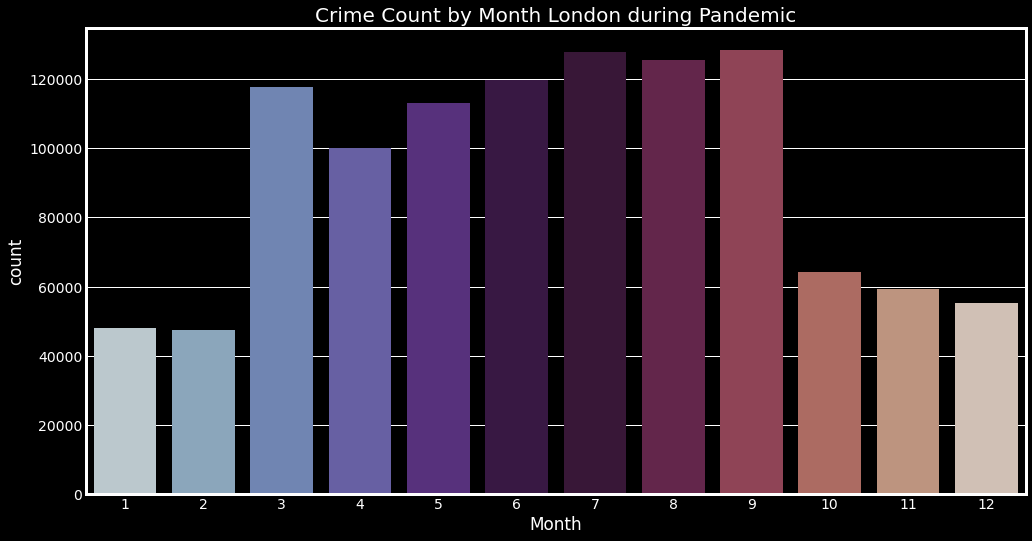

In [74]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data_s['month'].dt.month, palette = 'twilight',)
plt.title('Crime Count by Month London during Pandemic', fontsize = 20)
plt.xlabel('Month')
plt.show()

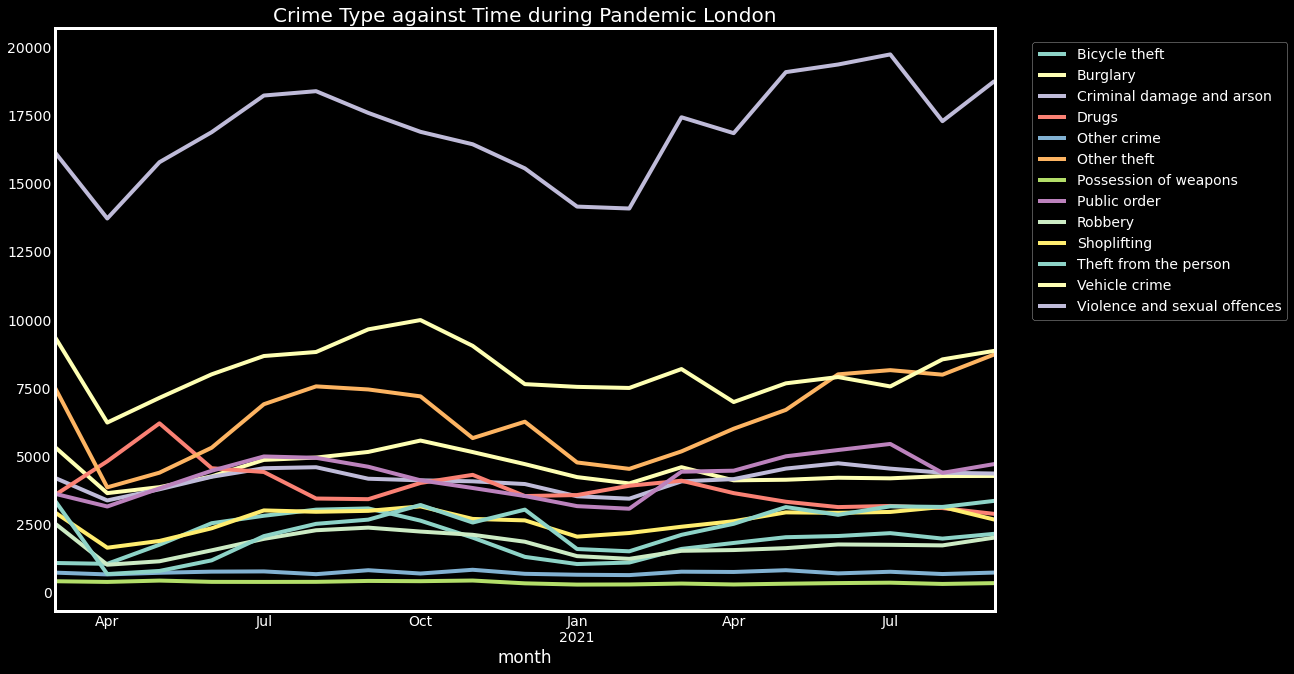

In [75]:
m = data_s.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))
plt.grid(b=None)

plt.title('Crime Type against Time during Pandemic London',fontsize = 20)

m.legend(loc=(1.04,0.5))

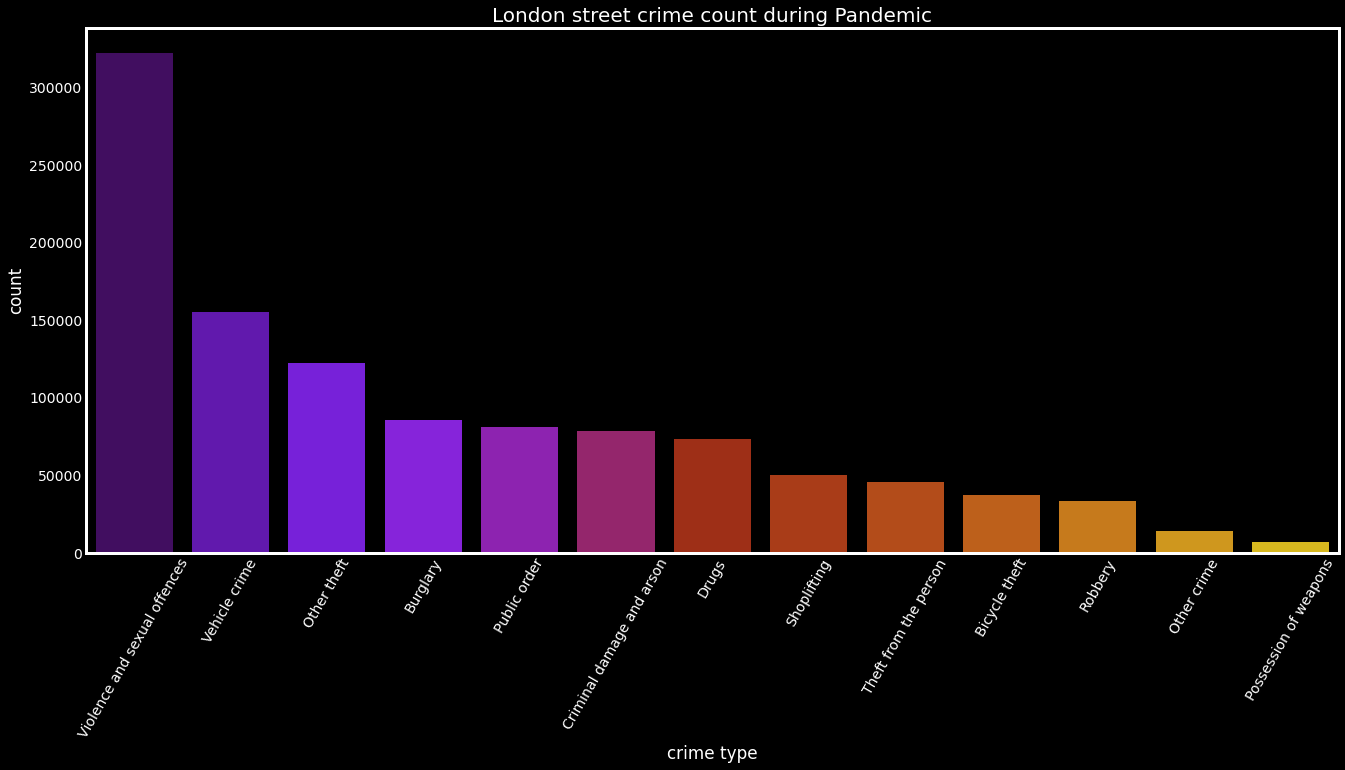

In [66]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(data_s['crime type'], order=data_s['crime type'].value_counts().index, palette = 'gnuplot')


plt.title('London street crime count during Pandemic', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 60, fontsize = 14)
plt.grid(False)
plt.show()

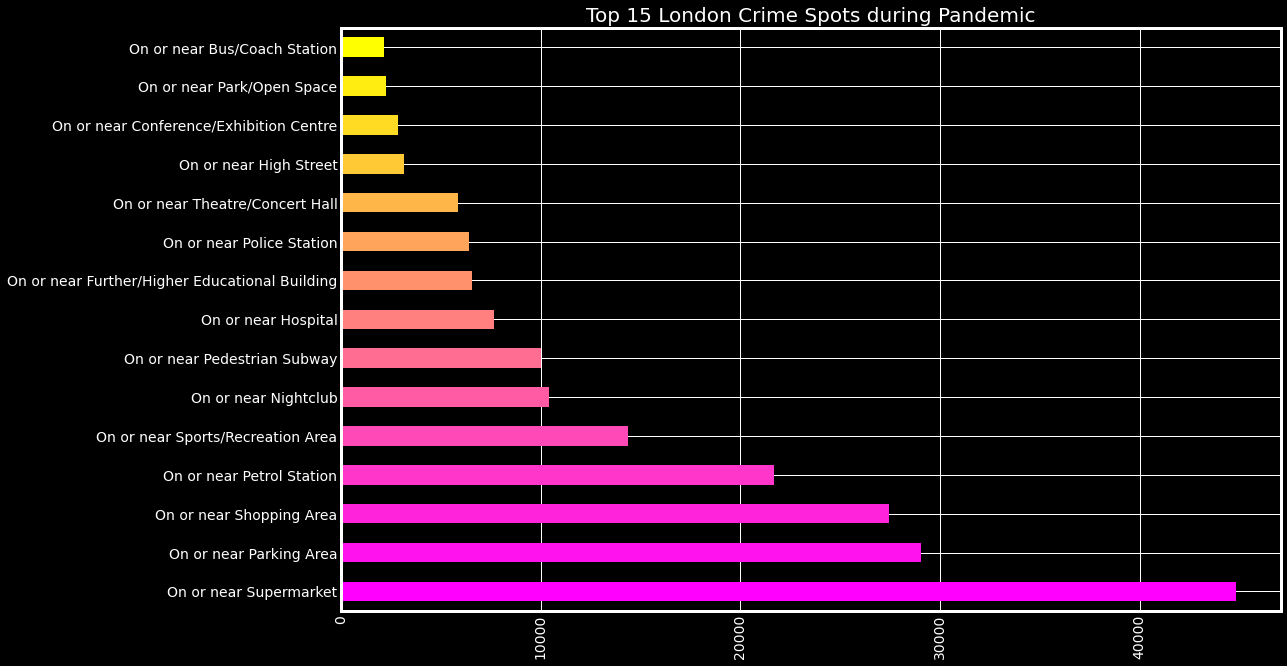

In [62]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
data_s['location'].value_counts().head(15).plot.barh(color = color, figsize = (15, 10))

plt.title('Top 15 London Crime Spots during Pandemic',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

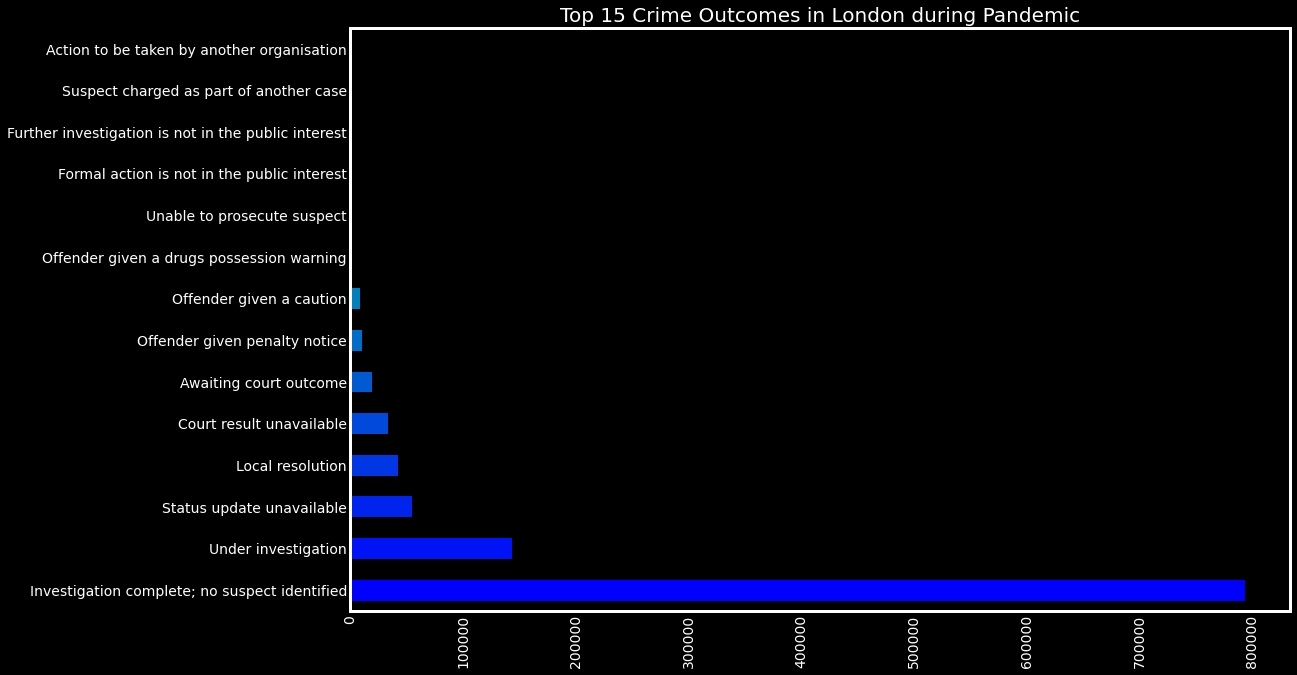

In [61]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
plt.style.use('dark_background')

color = plt.cm.winter(np.linspace(0, 1, 15))
data_s['last outcome category'].value_counts().head(15).plot.barh(color = color, figsize = (15, 10))

plt.title('Top 15 Crime Outcomes in London during Pandemic',fontsize = 20)

plt.xticks(rotation = 90)
plt.grid(b=None)
plt.show()

In [ ]:
#check different crime types reported
x = data_s['crime type'].value_counts()
y = data_s['crime type'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Violence and sexual offences    322274
Vehicle crime                   155330
Other theft                     122181
Burglary                         85550
Public order                     81031
Criminal damage and arson        78931
Drugs                            73200
Shoplifting                      50226
Theft from the person            45522
Bicycle theft                    37343
Robbery                          33674
Other crime                      13922
Possession of weapons             6989
Name: crime type, dtype: int64


There are are 13 categories 


### Adding Unemployment factor

Unemployment rates was a factor that was also influenced during the pandemic with and this shows an investigation on how the influence on employment could have had on street crimes

In [78]:
new_df = data.groupby(['month', 'crime type']).size().unstack() #data.groupby("month")['crime type'].value_counts().unstack(fill_value=0)
new_df

crime type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
month,,,,,,,,,,,,,
2018-01-01,1154,7548,4797,2828,836,8897,518,3130,2586,3826,3557,9339,15663
2018-02-01,1023,6512,4156,2528,717,8285,433,3000,2211,3562,3302,8673,14212
2018-03-01,1025,6306,4501,2495,831,8814,505,3553,2331,3674,3597,8845,16340
2018-04-01,1344,6297,4630,2678,757,8854,479,3538,2277,3800,3316,8819,15480
2018-05-01,1803,6320,4897,2721,854,9555,551,3858,2355,3837,3106,8779,17366
2018-06-01,1905,6043,4708,2383,788,9095,513,3839,2577,3633,3604,8894,17411
2018-07-01,2331,6238,4923,2326,814,10275,522,4384,2657,3465,3681,8989,18696
2018-08-01,2096,6433,4474,3014,760,9559,451,3489,2295,3542,3260,9108,16047
2018-09-01,2203,6014,4387,2712,799,9581,463,3538,2376,3369,2929,9673,16228


In [79]:
stringency = data[['month', 'stringency']].drop_duplicates()
#stringency

In [80]:
stringency['month'] = stringency['month'].dt.strftime('%Y-%m')

In [ ]:
#stringency

In [81]:
new_sum_col = list(new_df.sum(axis=1))
new_df['total crimes per month'] = new_sum_col
#new_df

In [84]:
# saving the dataframe
new_df.to_csv('data/collapsed_data1.csv', index='month')

In [87]:
new_df2 = pd.read_csv('data/collapsed_data1.csv')
#new_df2

In [88]:
new_df2['month'] = pd.to_datetime(new_df2.month)

In [89]:
stringency['month'] = pd.to_datetime(stringency.month)

In [90]:
new_df2 = pd.merge(new_df2, stringency, on="month", how="inner")
#new_df2

In [92]:
data1 = pd.read_csv('data/unemployment-london-region.csv')
#data1

In [93]:
data1['month'] = data1['month'].apply(lambda x: dt.datetime.strptime(x,'%b-%y') if type(x)==str else pd.NaT)

In [94]:
data1['month'] = data1['month'].dt.strftime('%Y-%m')

In [95]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            45 non-null     object 
 1   Numbers ('000s)  45 non-null     int64  
 2   Rates (%)        45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [96]:
data1['month'] = pd.to_datetime(data1.month)

In [97]:
#Merge the unemployment df with crime df

df = pd.merge(new_df2, data1, on="month", how="inner")
df

,month,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,total crimes per month,stringency,Numbers ('000s),Rates (%)
0,2018-01-01,1154,7548,4797,2828,836,8897,518,3130,2586,3826,3557,9339,15663,64679,0.000000,247,5.0
1,2018-02-01,1023,6512,4156,2528,717,8285,433,3000,2211,3562,3302,8673,14212,58614,0.000000,239,4.8
2,2018-03-01,1025,6306,4501,2495,831,8814,505,3553,2331,3674,3597,8845,16340,62817,0.000000,247,4.9
3,2018-04-01,1344,6297,4630,2678,757,8854,479,3538,2277,3800,3316,8819,15480,62269,0.000000,260,5.2
4,2018-05-01,1803,6320,4897,2721,854,9555,551,3858,2355,3837,3106,8779,17366,66002,0.000000,255,5.1
5,2018-06-01,1905,6043,4708,2383,788,9095,513,3839,2577,3633,3604,8894,17411,65393,0.000000,242,4.9
6,2018-07-01,2331,6238,4923,2326,814,10275,522,4384,2657,3465,3681,8989,18696,69301,0.000000,235,4.7
7,2018-08-01,2096,6433,4474,3014,760,9559,451,3489,2295,3542,3260,9108,16047,64528,0.000000,237,4.8
8,2018-09-01,2203,6014,4387,2712,799,9581,463,3538,2376,3369,2929,9673,16228,64272,0.000000,234,4.7
9,2018-10-01,2168,7095,4731,2813,782,10547,448,3619,2616,3716,3740,10372,16742,69389,0.000000,236,4.7


In [109]:
df.columns = map(str.lower, df.columns)

In [110]:
#Rename columns
df = df.rename(columns={"numbers ('000s)":"unemployment numbers(000s)",
            
                   "rates (%)":"unemployment rate(%)"
                   })
df

,month,bicycle theft,burglary,criminal damage and arson,drugs,other crime,other theft,possession of weapons,public order,robbery,shoplifting,theft from the person,vehicle crime,violence and sexual offences,total crimes per month,stringency,unemployment numbers(000s),unemployment rate(%)
0,2018-01-01,1154,7548,4797,2828,836,8897,518,3130,2586,3826,3557,9339,15663,64679,0.000000,247,5.0
1,2018-02-01,1023,6512,4156,2528,717,8285,433,3000,2211,3562,3302,8673,14212,58614,0.000000,239,4.8
2,2018-03-01,1025,6306,4501,2495,831,8814,505,3553,2331,3674,3597,8845,16340,62817,0.000000,247,4.9
3,2018-04-01,1344,6297,4630,2678,757,8854,479,3538,2277,3800,3316,8819,15480,62269,0.000000,260,5.2
4,2018-05-01,1803,6320,4897,2721,854,9555,551,3858,2355,3837,3106,8779,17366,66002,0.000000,255,5.1
5,2018-06-01,1905,6043,4708,2383,788,9095,513,3839,2577,3633,3604,8894,17411,65393,0.000000,242,4.9
6,2018-07-01,2331,6238,4923,2326,814,10275,522,4384,2657,3465,3681,8989,18696,69301,0.000000,235,4.7
7,2018-08-01,2096,6433,4474,3014,760,9559,451,3489,2295,3542,3260,9108,16047,64528,0.000000,237,4.8
8,2018-09-01,2203,6014,4387,2712,799,9581,463,3538,2376,3369,2929,9673,16228,64272,0.000000,234,4.7
9,2018-10-01,2168,7095,4731,2813,782,10547,448,3619,2616,3716,3740,10372,16742,69389,0.000000,236,4.7


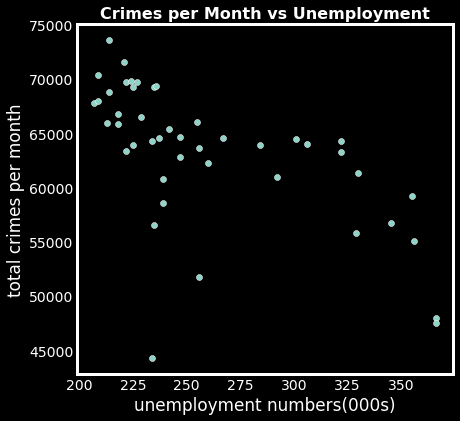

In [126]:
plt.figure(figsize=(6,6))
sns.scatterplot(df["unemployment numbers(000s)"], df['total crimes per month'])
plt.title('Crimes per Month vs Unemployment', fontsize = 16, fontweight='bold')
plt.grid(False)
plt.show()

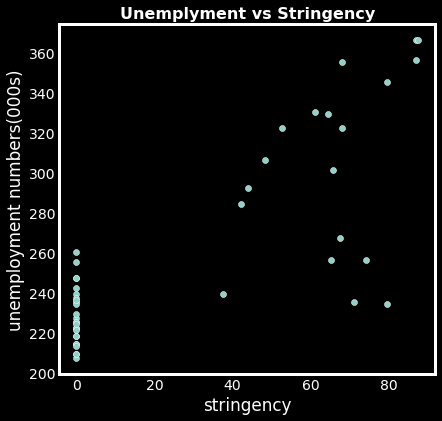

In [124]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['stringency'],df["unemployment numbers(000s)"])
plt.title('Unemplyment vs Stringency', fontsize = 16, fontweight='bold')
plt.grid(False)
plt.show()

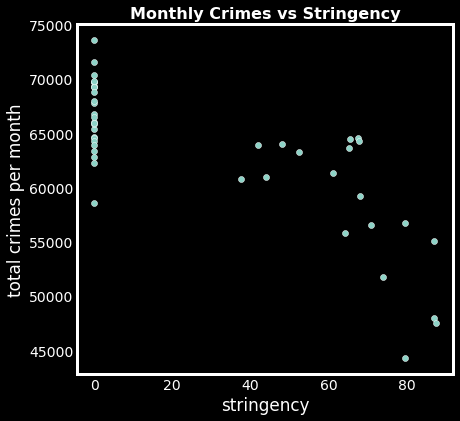

In [125]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['stringency'],df["total crimes per month"])
plt.title('Monthly Crimes vs Stringency', fontsize = 16, fontweight='bold')
plt.grid(False)
plt.show()

In [ ]:
columns_num = df.describe().columns.tolist()  # numeric variables
columns_num

['bicycle theft',
 'burglary',
 'criminal damage and arson',
 'drugs',
 'other crime',
 'other theft',
 'possession of weapons',
 'public order',
 'robbery',
 'shoplifting',
 'theft from the person',
 'vehicle crime',
 'violence and sexual offences',
 'total crimes per month',
 'stringency',
 'unemployment numbers(000s)']

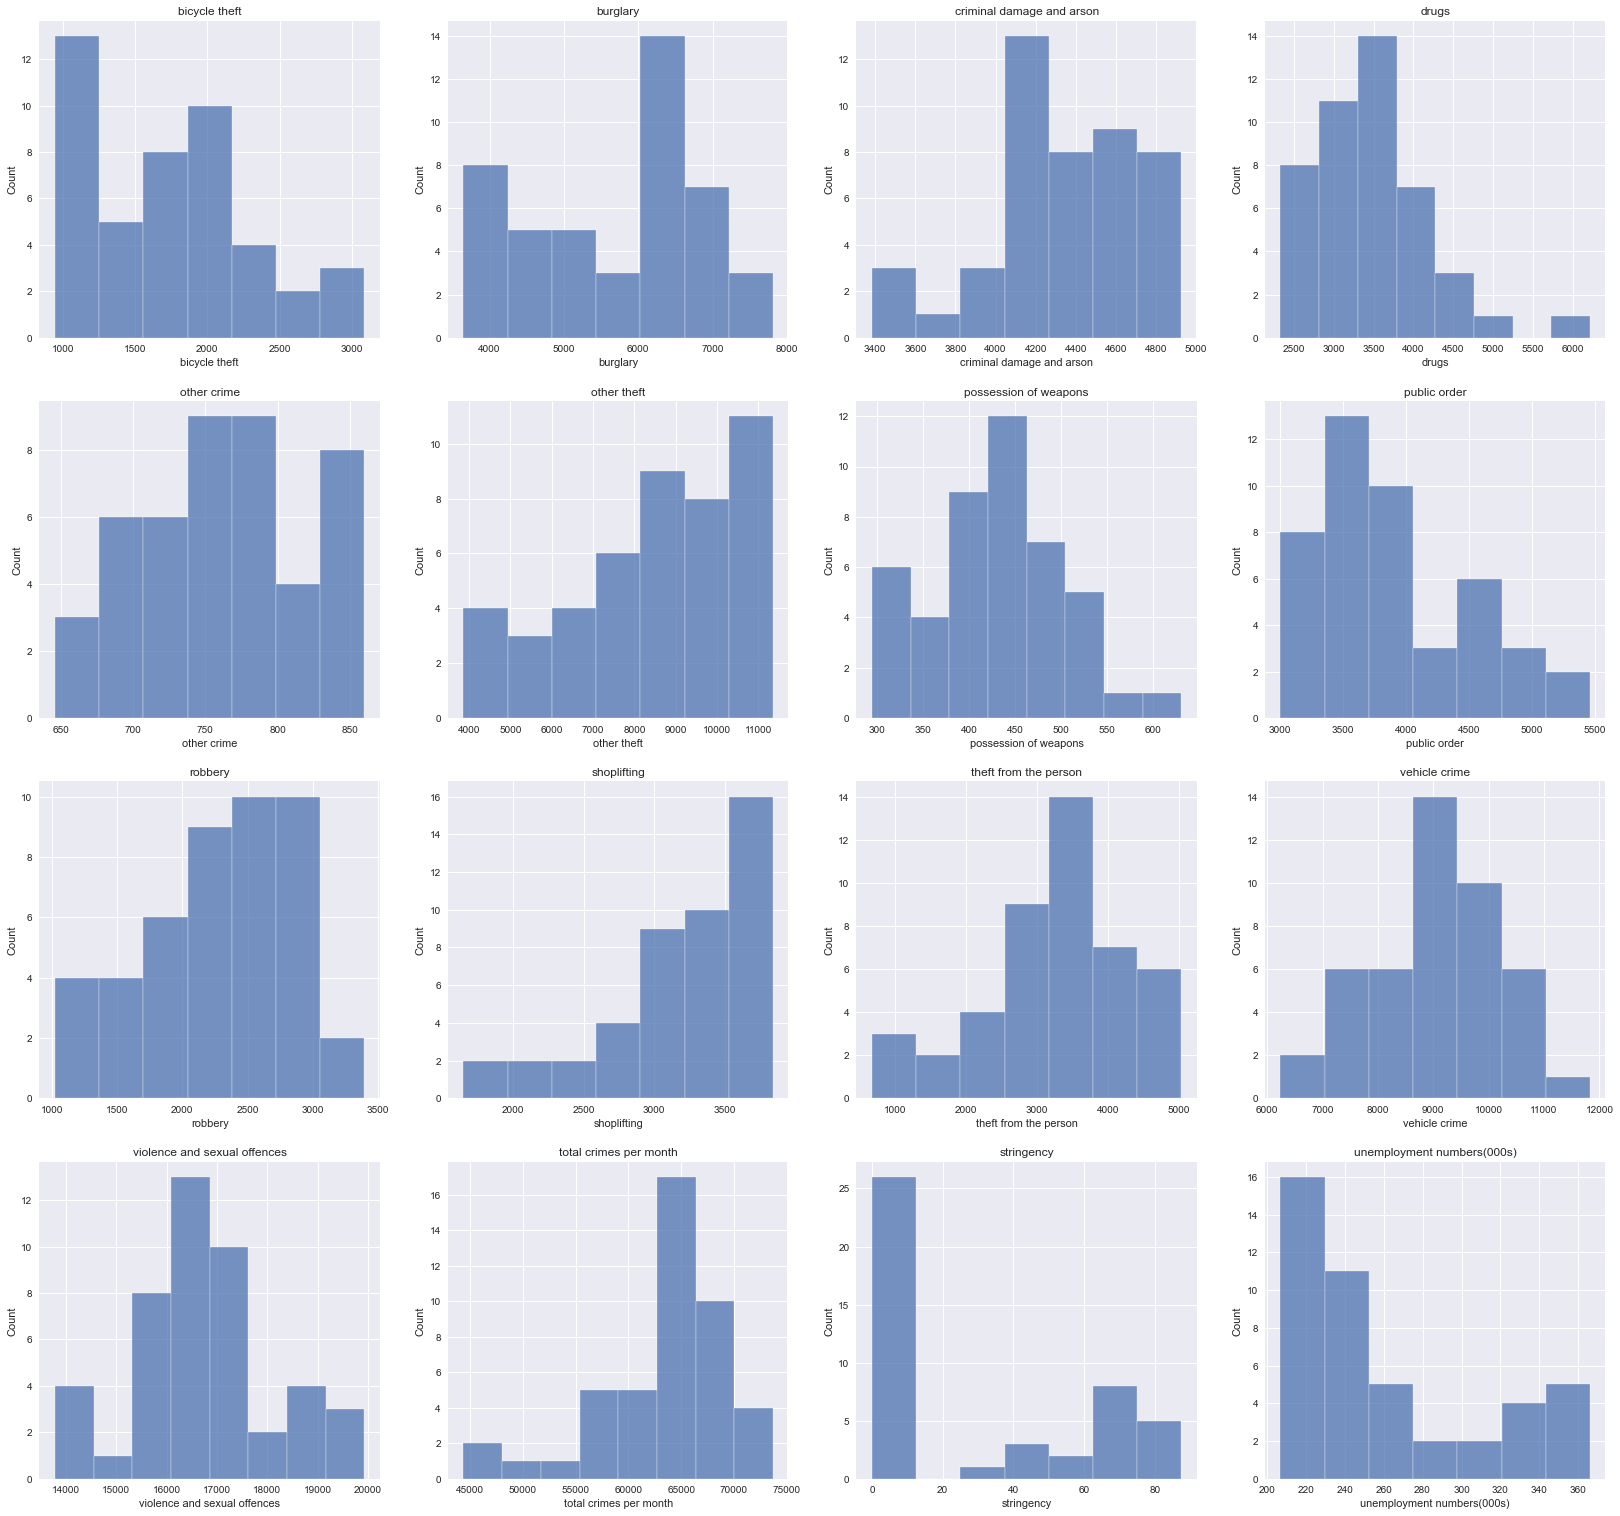

In [ ]:
# Histograms for each crime type monthly count London
plt.style.use('seaborn')
fig, ax = plt.subplots(4, 4, figsize=(25,25))
ax = ax.flatten()
for i, _ in enumerate(columns_num):
    sns.histplot(data=df[columns_num[i]], ax=ax[i])
    ax[i].set_title(columns_num[i])
plt.show()

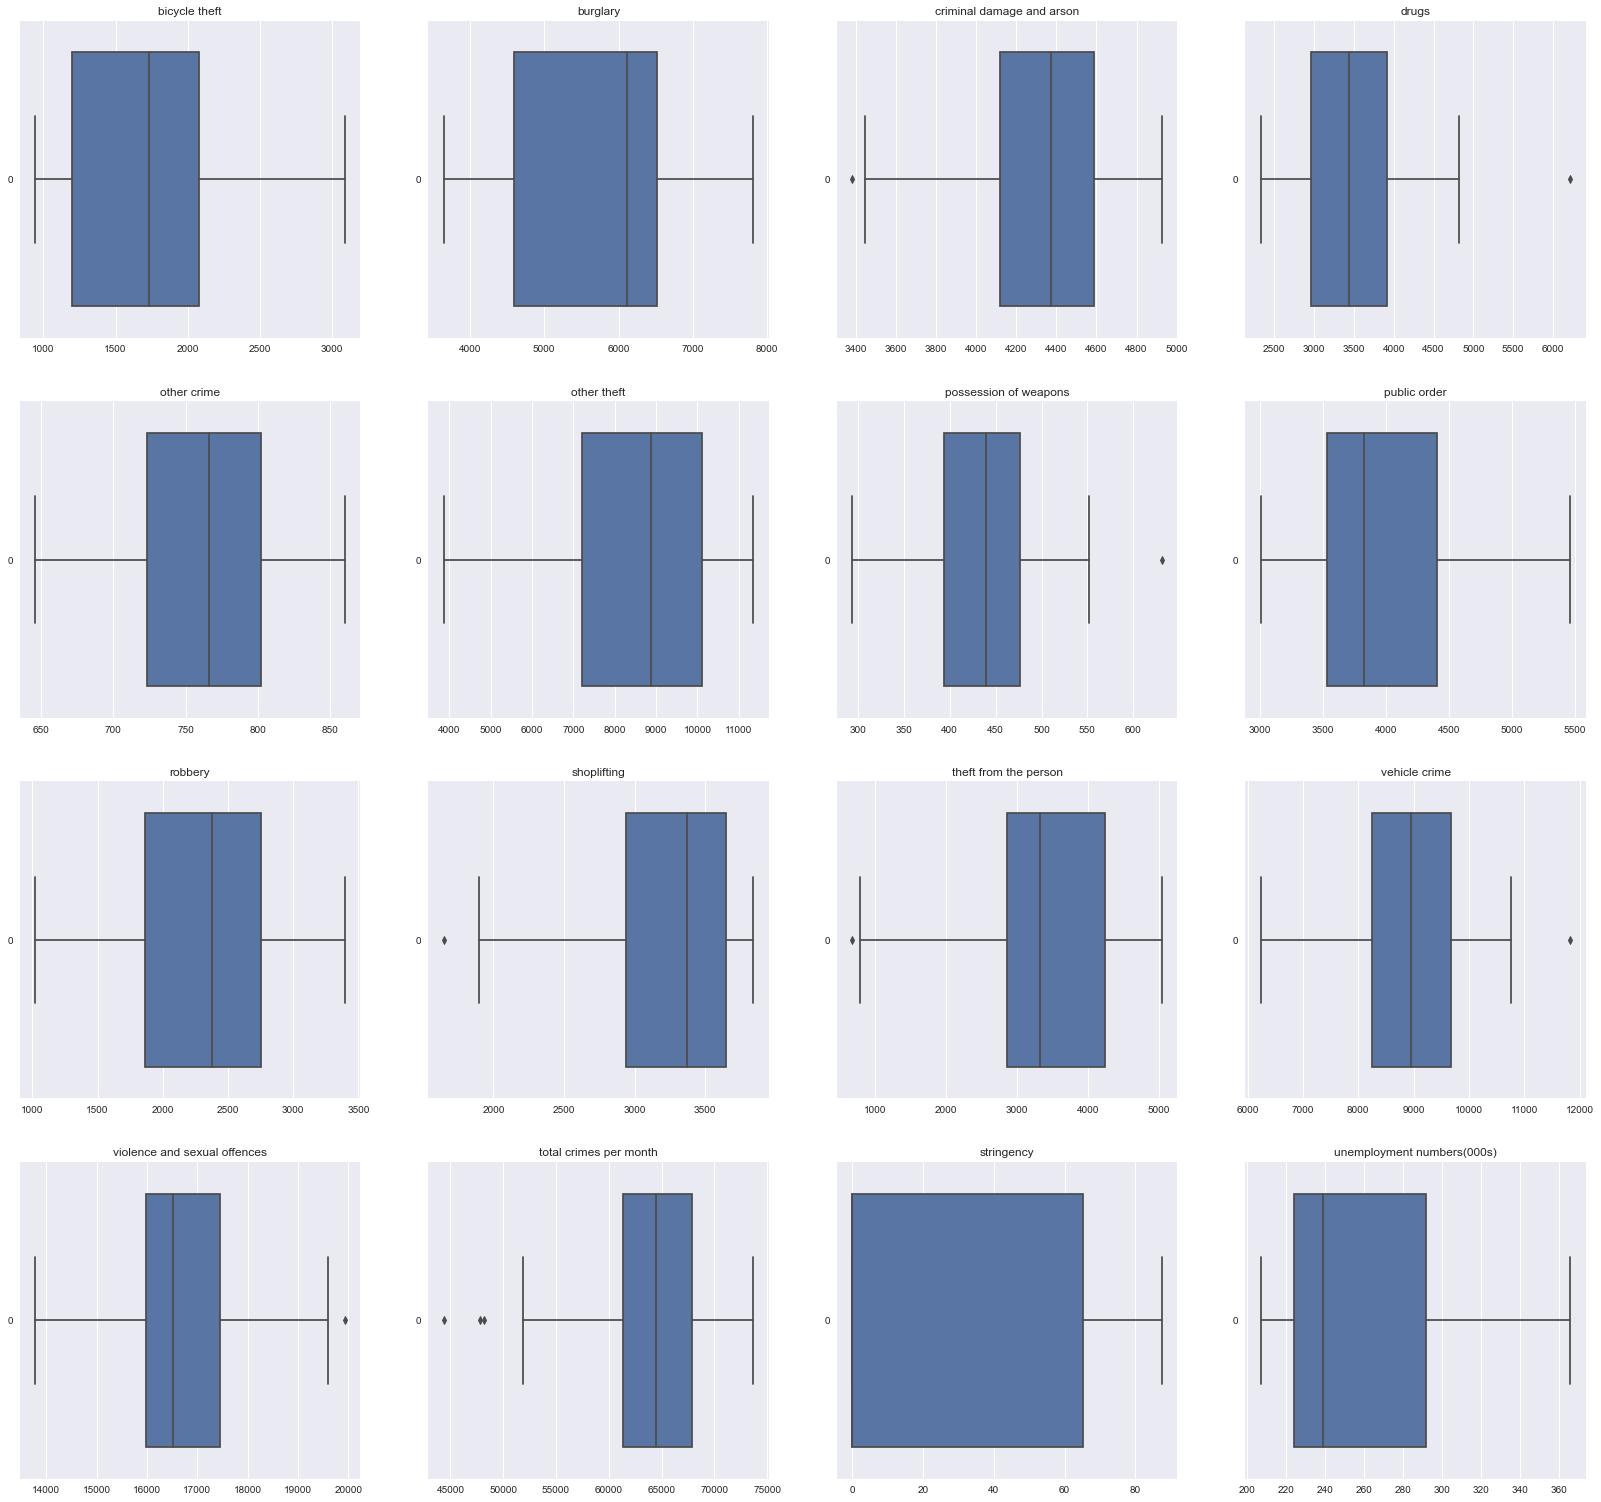

In [ ]:
# Distribution of each crime type monthly count in London
plt.style.use('seaborn')
fig, ax = plt.subplots(4, 4, figsize=(25,25))
ax = ax.flatten()
for i, _ in enumerate(columns_num):
    sns.boxplot(data=df[columns_num[i]], ax=ax[i], orient="h")
    ax[i].set_title(columns_num[i])
plt.show()

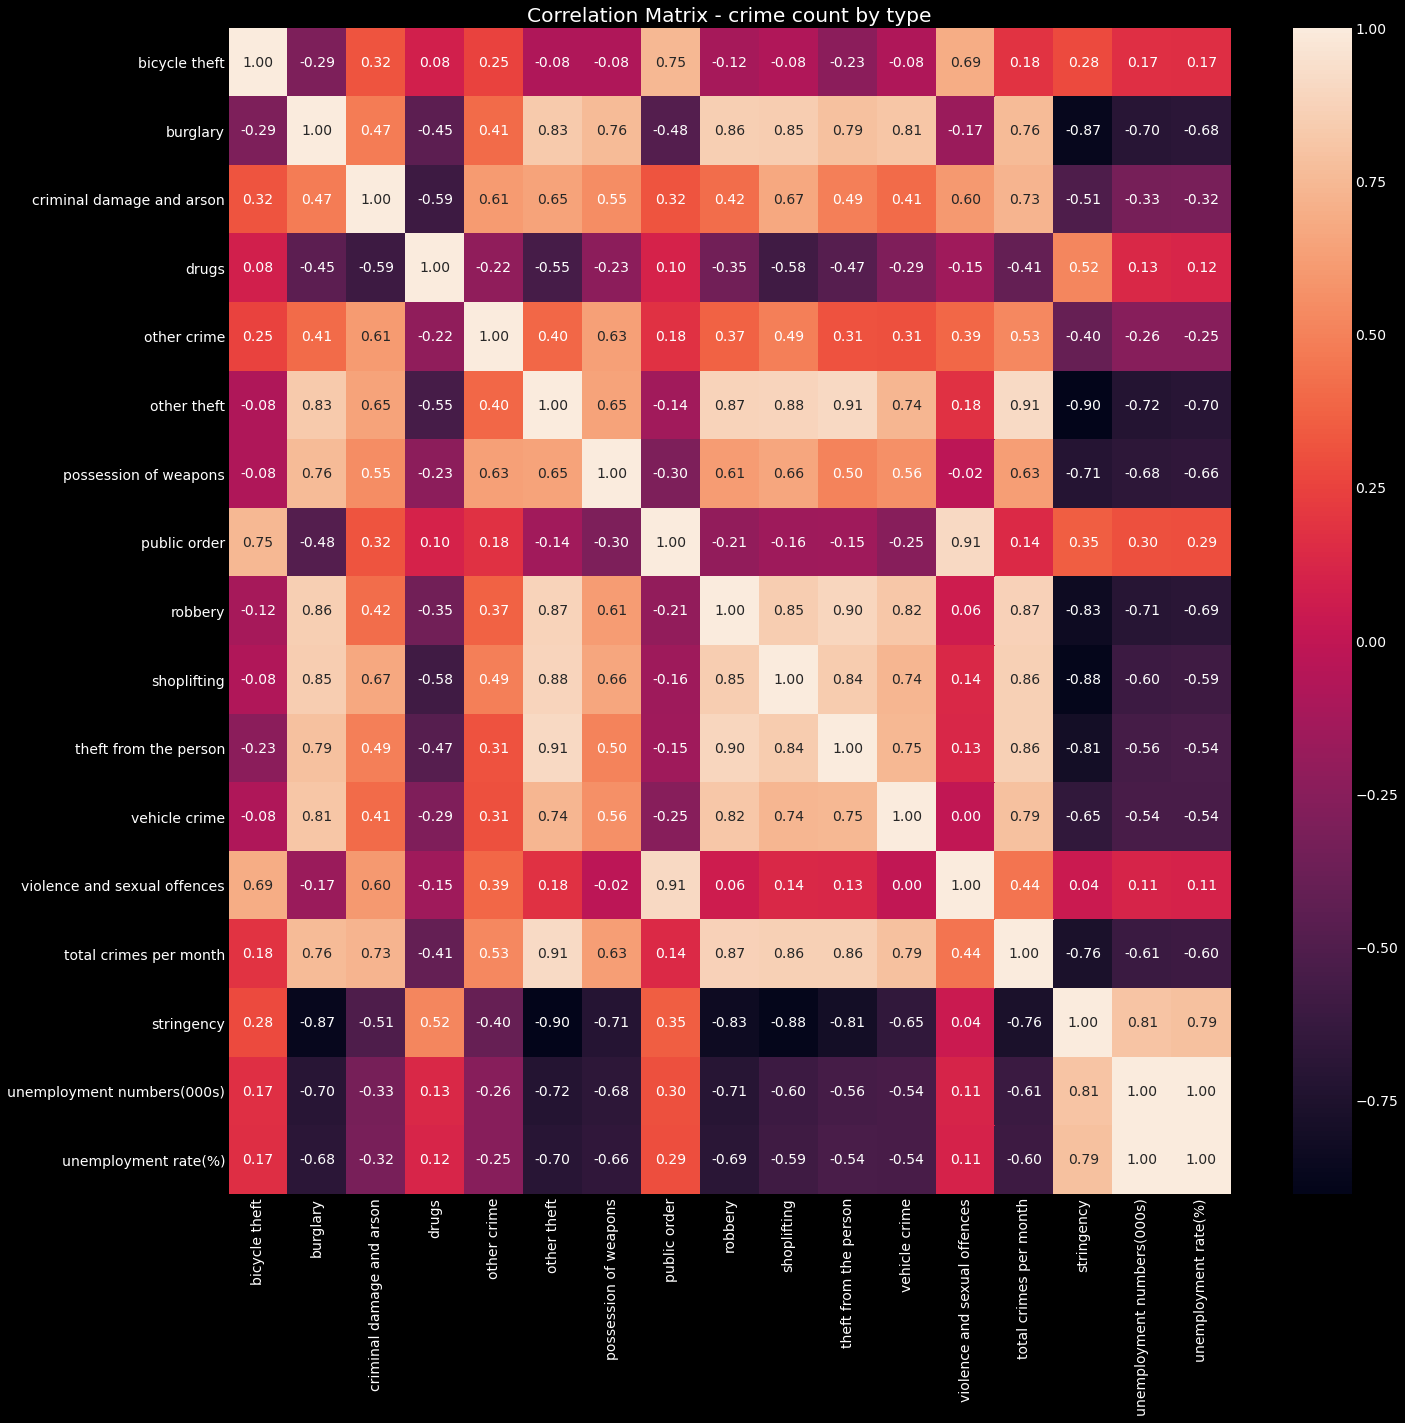

In [112]:
#Correlation Matrix cime types count
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.2f', color='purple')
plt.title('Correlation Matrix - crime count by type')
plt.show()
f.savefig('Data Correlation Matrix')

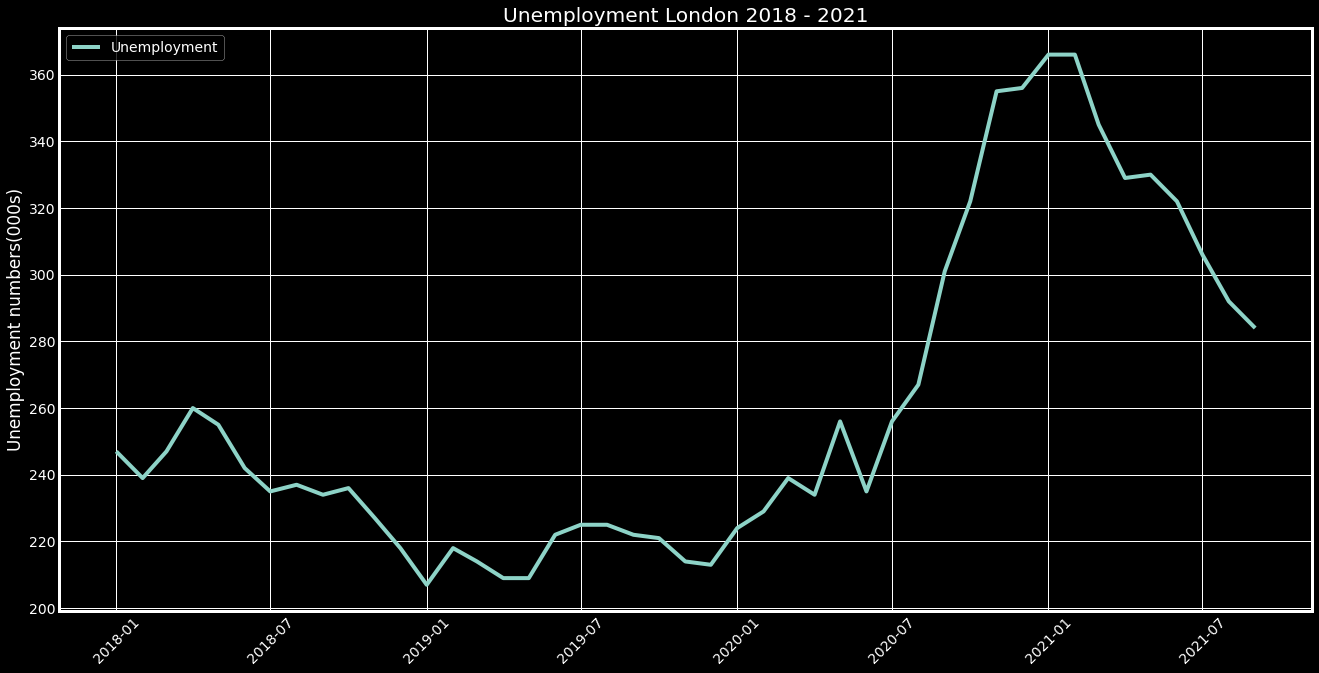

In [111]:
plt.figure(figsize=(20,10))

plt.plot(df['month'], df["unemployment numbers(000s)"], label = 'Unemployment')

plt.ylabel('Unemployment numbers(000s)')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Unemployment London 2018 - 2021')

plt.show()

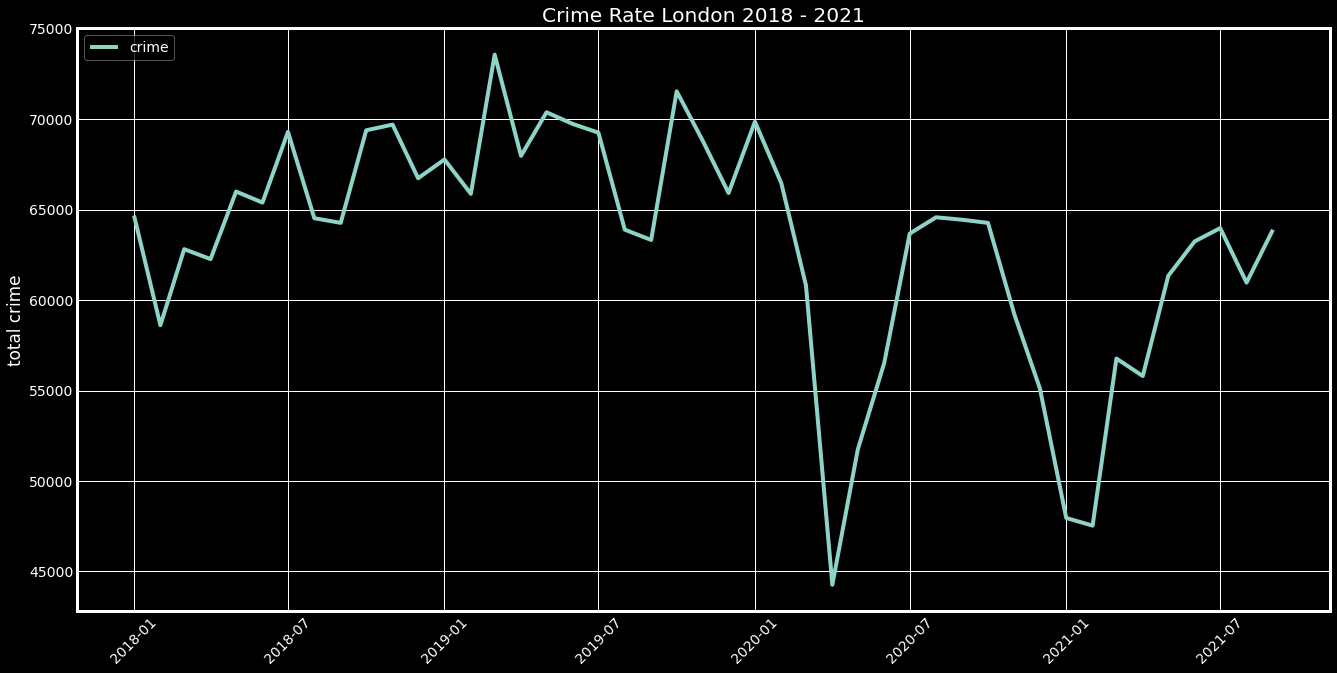

In [105]:
# display crime rate

plt.figure(figsize=(20,10))

plt.plot(df['month'], df['total crimes per month'], label = 'crime')

plt.ylabel('total crime')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Crime Rate London 2018 - 2021')
plt.show()

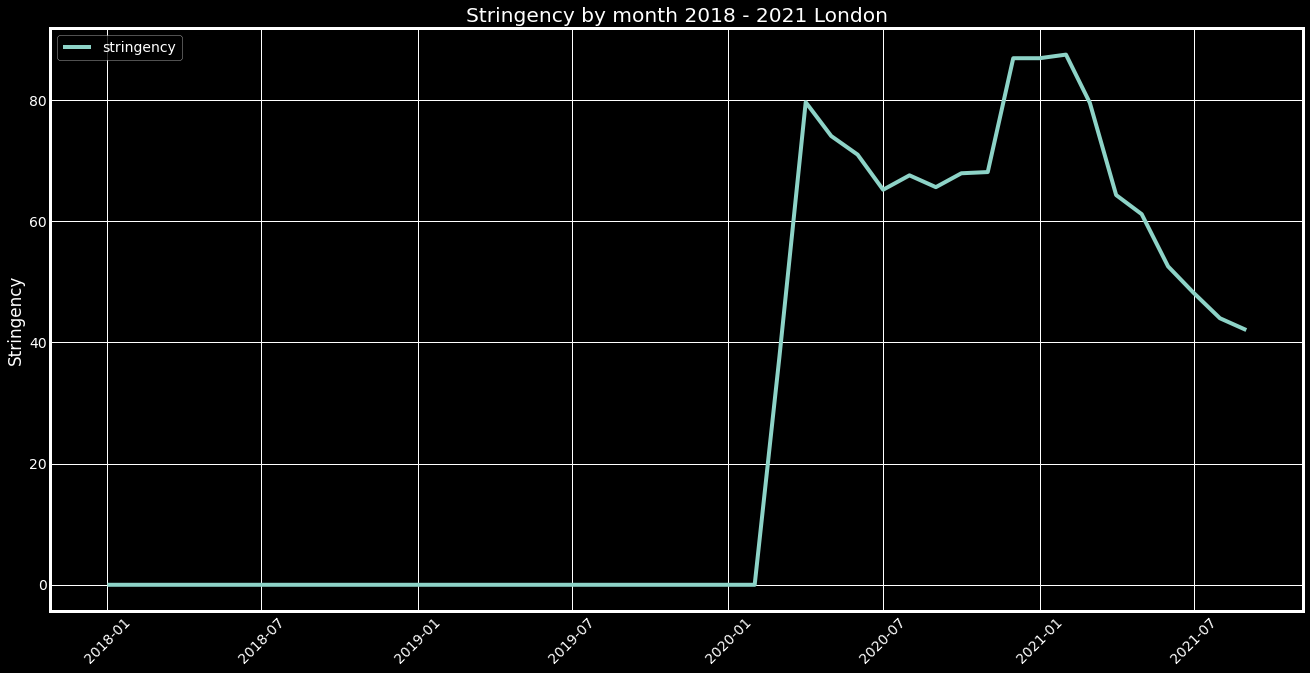

In [103]:
plt.figure(figsize=(20,10))

plt.plot(df['month'], df['stringency'], label = 'stringency')

plt.title('Stringency by month 2018 - 2021 London')
plt.ylabel('Stringency')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()